In [1]:
import numpy as np

from scipy.cluster import hierarchy as hac
from sklearn import preprocessing as ppr

import matplotlib.pyplot as plt
import pickle

In [2]:
def tfidf(count_matrix):
    ''' Takes as input a count matrix 
        of term occurencies in documents
        'doc-term' (N_doc x N_term)
        and returns a tfidf matrix of 
        same dimensions'''
    
    [total_number_of_documents, total_number_of_terms] = count_matrix.shape
            
    tf = count_matrix
    
    documents_containing_the_word = np.count_nonzero(count_matrix, axis = 0)

    df = (documents_containing_the_word + 1)/(total_number_of_documents +1)
    idf = np.log(np.reciprocal(df)) + 1
    
    tf_idf = np.zeros([total_number_of_documents, total_number_of_terms])

    for i in range(total_number_of_documents):
        tf_idf[i,:] = tf[i,:]*idf
    
    tf_idf = ppr.normalize(tf_idf, norm='l2')
    return(tf_idf)

In [3]:
with open('data.train', 'r', 10000) as t:
    lines = t.read().splitlines()
    
print('Comments:')
print(len(lines))

voc_dict = {}
voc_dict_inv = {}
i = 0
with open('vocab.bpe.from','r') as f:
    keys = f.read().splitlines()
    for key in keys:
        if i>2 :
            voc_dict[i-3] = key
            voc_dict_inv[key] = i-3            
#             print(key)
        i+=1
print('\nVocabulary size:')
print(i)

with open('subreddits.train','r') as l:
    ls = l.read().splitlines()
    label_names = list(set(ls))
        
# print(label_names)

labels_dict = {}
labels_dict_inv = {}
for i, label_name in enumerate(label_names):
    labels_dict[i] = label_name
    labels_dict_inv[label_name] = i

print('\nLabels dictionary size:')
print(len(labels_dict))
# print(labels_dict_inv)

subredditsXvocwords = np.zeros([len(labels_dict), 15000])

for i, (comment, label) in enumerate(zip(lines,ls)):
    words = comment.split(' ')
    for w in words:
        subredditsXvocwords[labels_dict_inv[label], voc_dict_inv[w]] += 1

del(lines)
del(ls)

Comments:
15239328

Vocabulary size:
15003

Labels dictionary size:
1342


In [4]:
stop_words = 0
for i in range(15000):
#     print(np.count_nonzero(count_matrix[:,i]))
    if np.count_nonzero(subredditsXvocwords[:,i])/1342 >= 0.8 :
#         print(voc_dict[i])
        stop_words+=1

In [5]:
stop_words

3591

In [6]:
small_keys=[]
voc_dict_clean={}
voc_dict_inv_clean={}
count_matrix_small = np.zeros([1342,15000-stop_words])

counter = 0
non_stop_words = 0
for i in range(15000):
#     print(np.count_nonzero(count_matrix[:,i]))
    if  np.count_nonzero(subredditsXvocwords[:,i])/1342<0.8 :
#         print(voc_dict[i])
        non_stop_words+=1
        small_keys.append(voc_dict[i])
        
        voc_dict_clean[counter]=voc_dict[i]
        voc_dict_inv_clean[voc_dict[i]]=counter
        count_matrix_small[:,counter] += subredditsXvocwords[:,i]
        counter+=1
        
        
print(non_stop_words)

11409


In [7]:
subreddit_tf_idf = tfidf(count_matrix_small)
z = hac.linkage(subreddit_tf_idf, method = 'complete', metric = 'cosine')

In [8]:
# makes list of N clusters after (1342-Ν) unions

k = np.zeros([len(labels_dict)-1, 2])
k[:,0]=z[:,0]
k[:,1]=z[:,1]
k = k.astype(int)
l = k.tolist()
m = [[] for x in range(2*len(labels_dict)-1)]
for i in range(len(labels_dict)):
    m[i].append(i)

N=40

for k in range(len(labels_dict)-N):
    for j in range(2):
        if l[k][j]<len(labels_dict):
            m[k+len(labels_dict)].append(l[k][j])
            m[l[k][j]]=[]
        else:
            for i in m[l[k][j]]:
                m[k+len(labels_dict)].append(i)
            m[l[k][j]]=[]


 Cluster 1 with 1 subreddits

 Cluster 2 with 3 subreddits


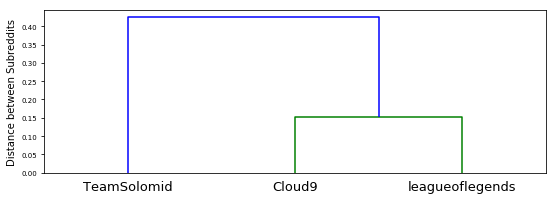


 Cluster 3 with 2 subreddits


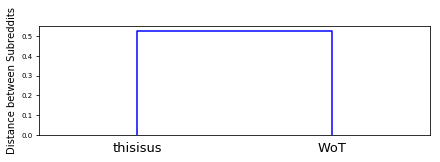


 Cluster 4 with 2 subreddits


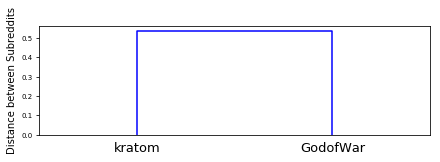


 Cluster 5 with 4 subreddits


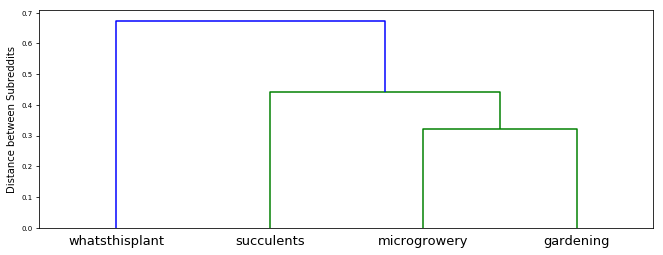


 Cluster 6 with 2 subreddits


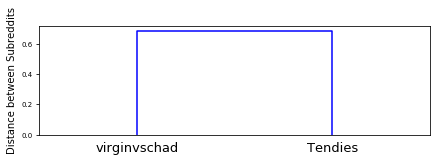


 Cluster 7 with 18 subreddits


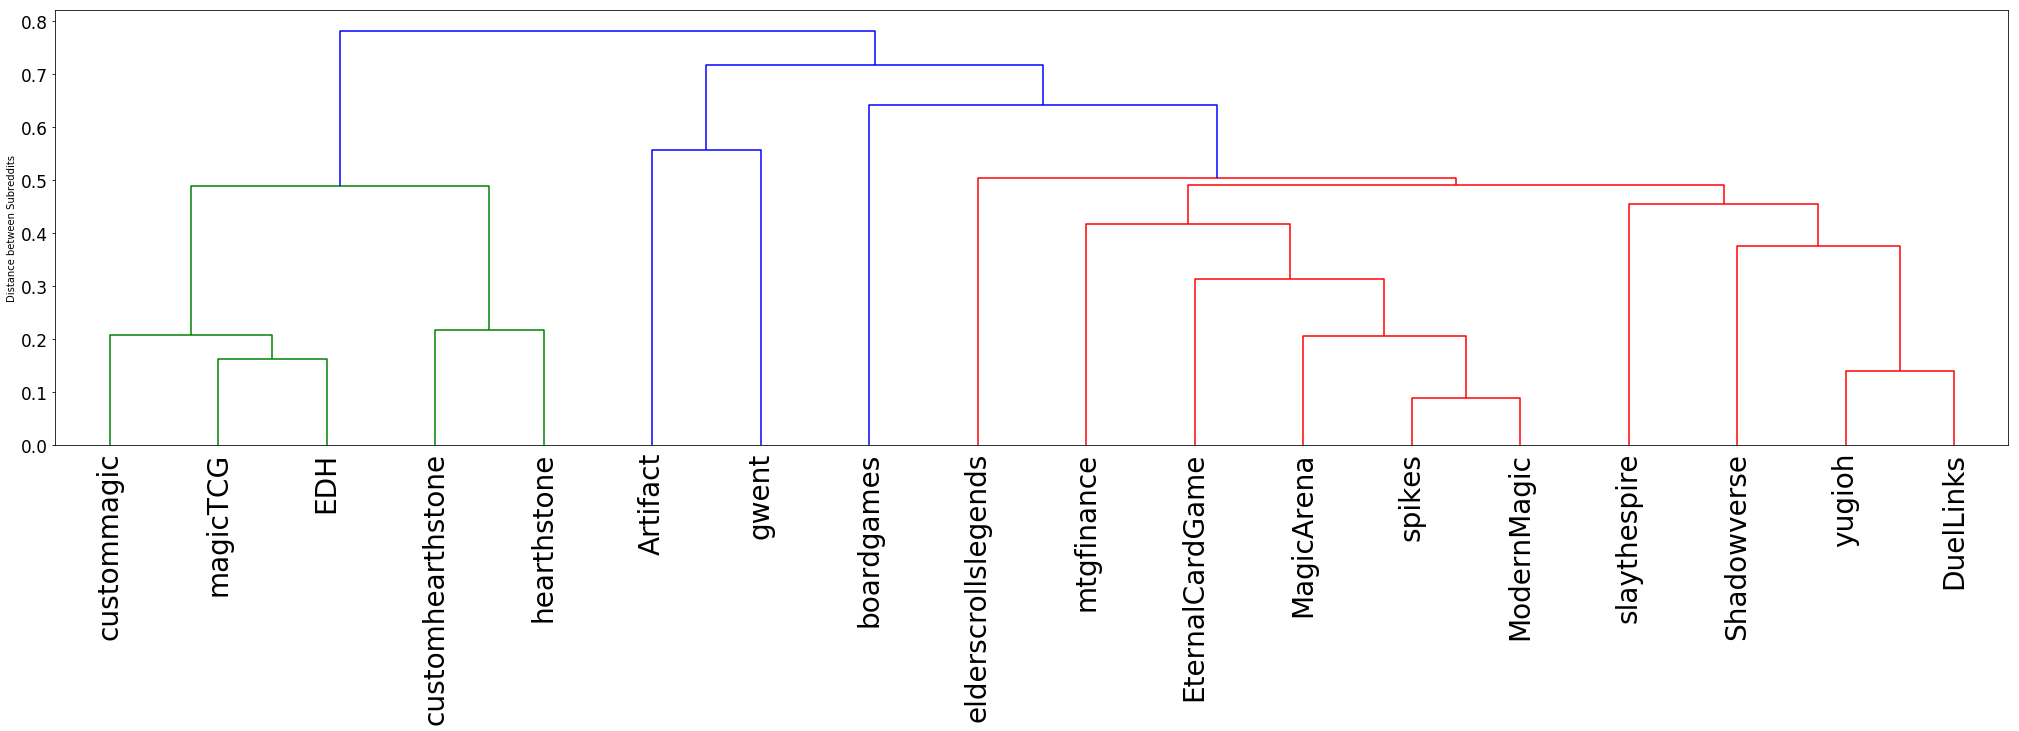


 Cluster 8 with 3 subreddits


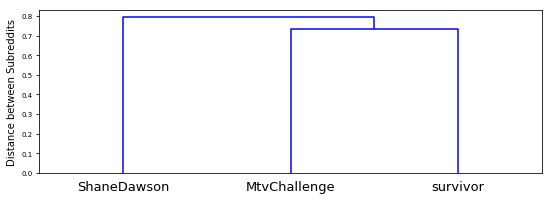


 Cluster 9 with 2 subreddits


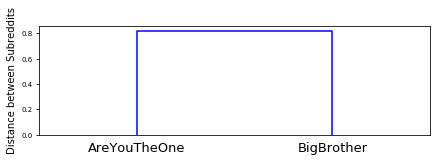


 Cluster 10 with 9 subreddits


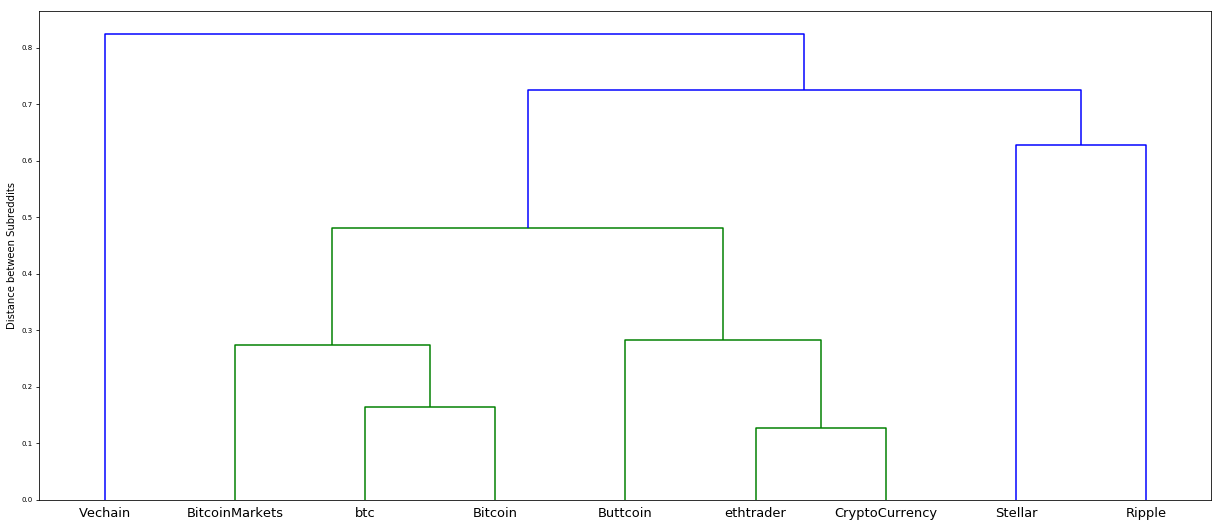


 Cluster 11 with 7 subreddits


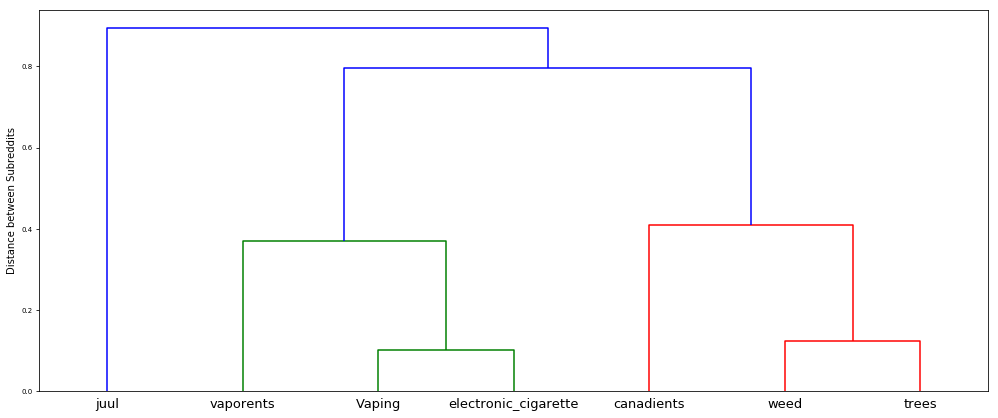


 Cluster 12 with 2 subreddits


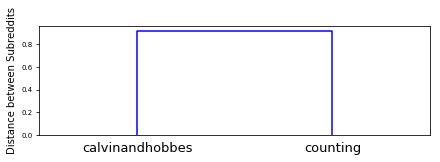


 Cluster 13 with 7 subreddits


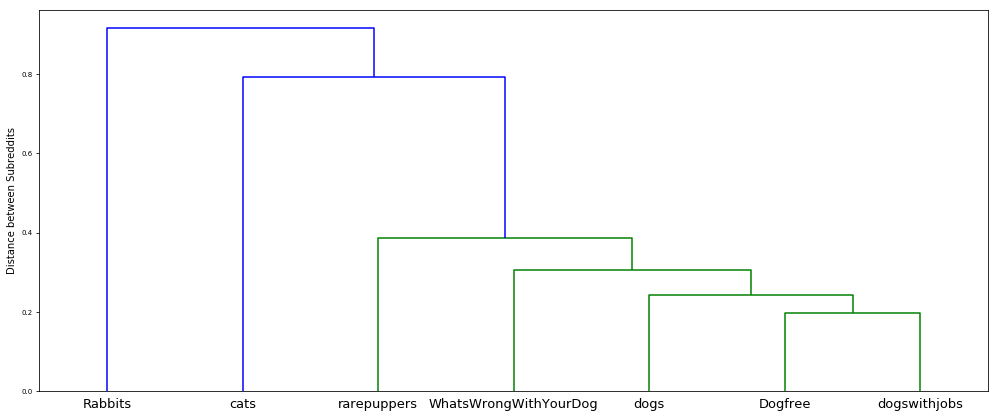


 Cluster 14 with 6 subreddits


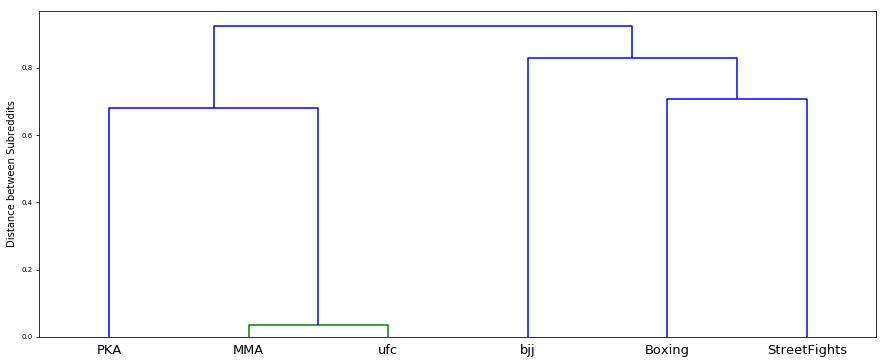


 Cluster 15 with 3 subreddits


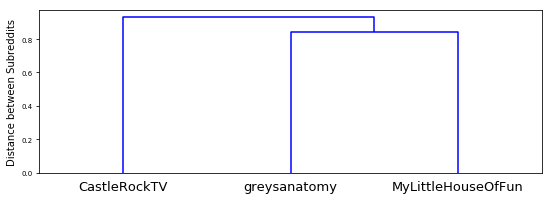


 Cluster 16 with 4 subreddits


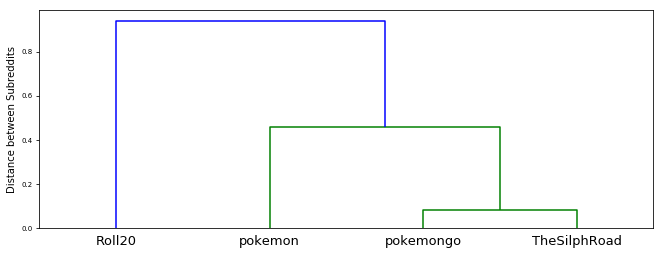


 Cluster 17 with 5 subreddits


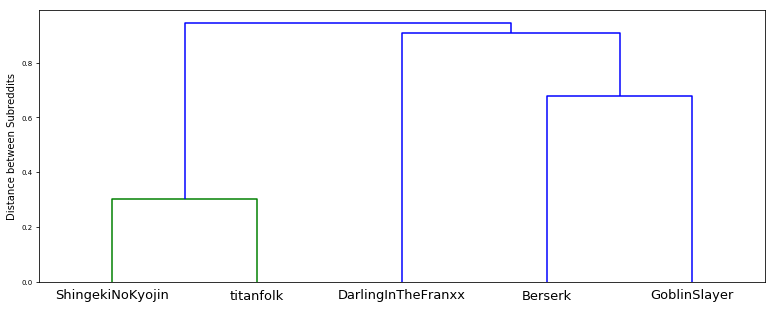


 Cluster 18 with 15 subreddits


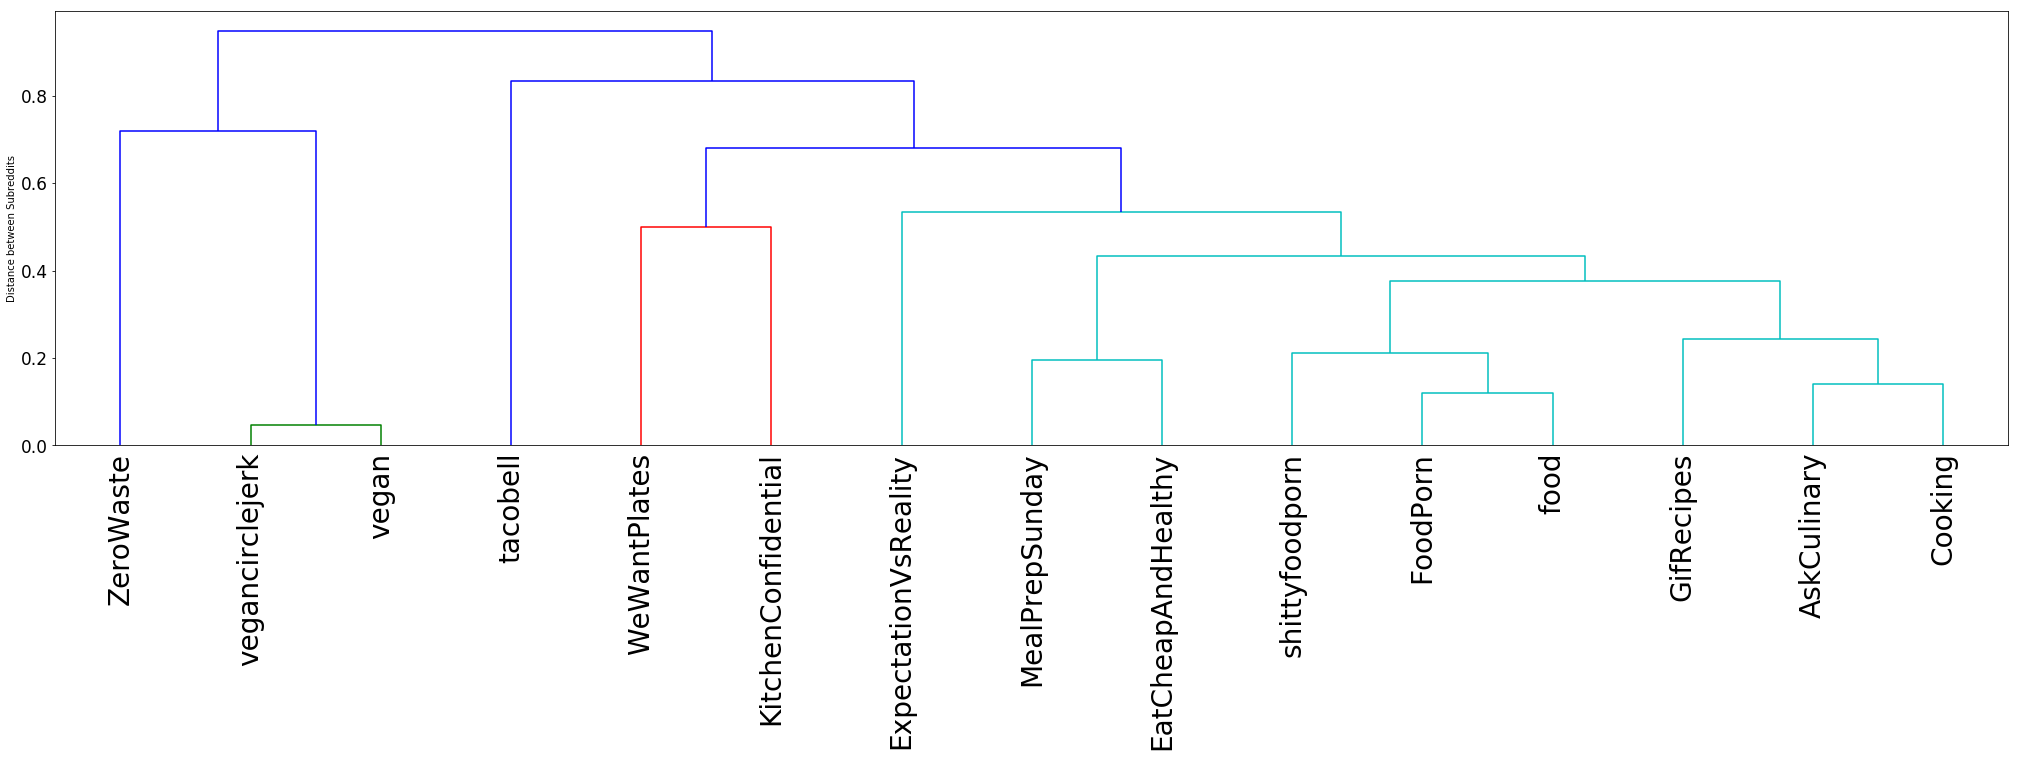


 Cluster 19 with 4 subreddits


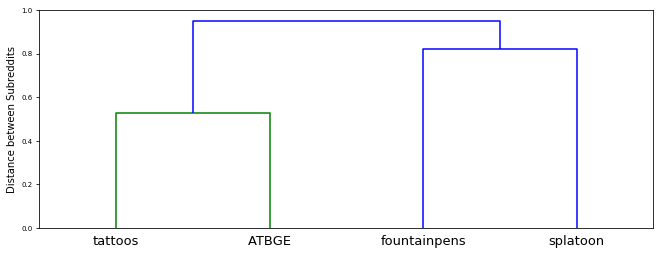


 Cluster 20 with 12 subreddits


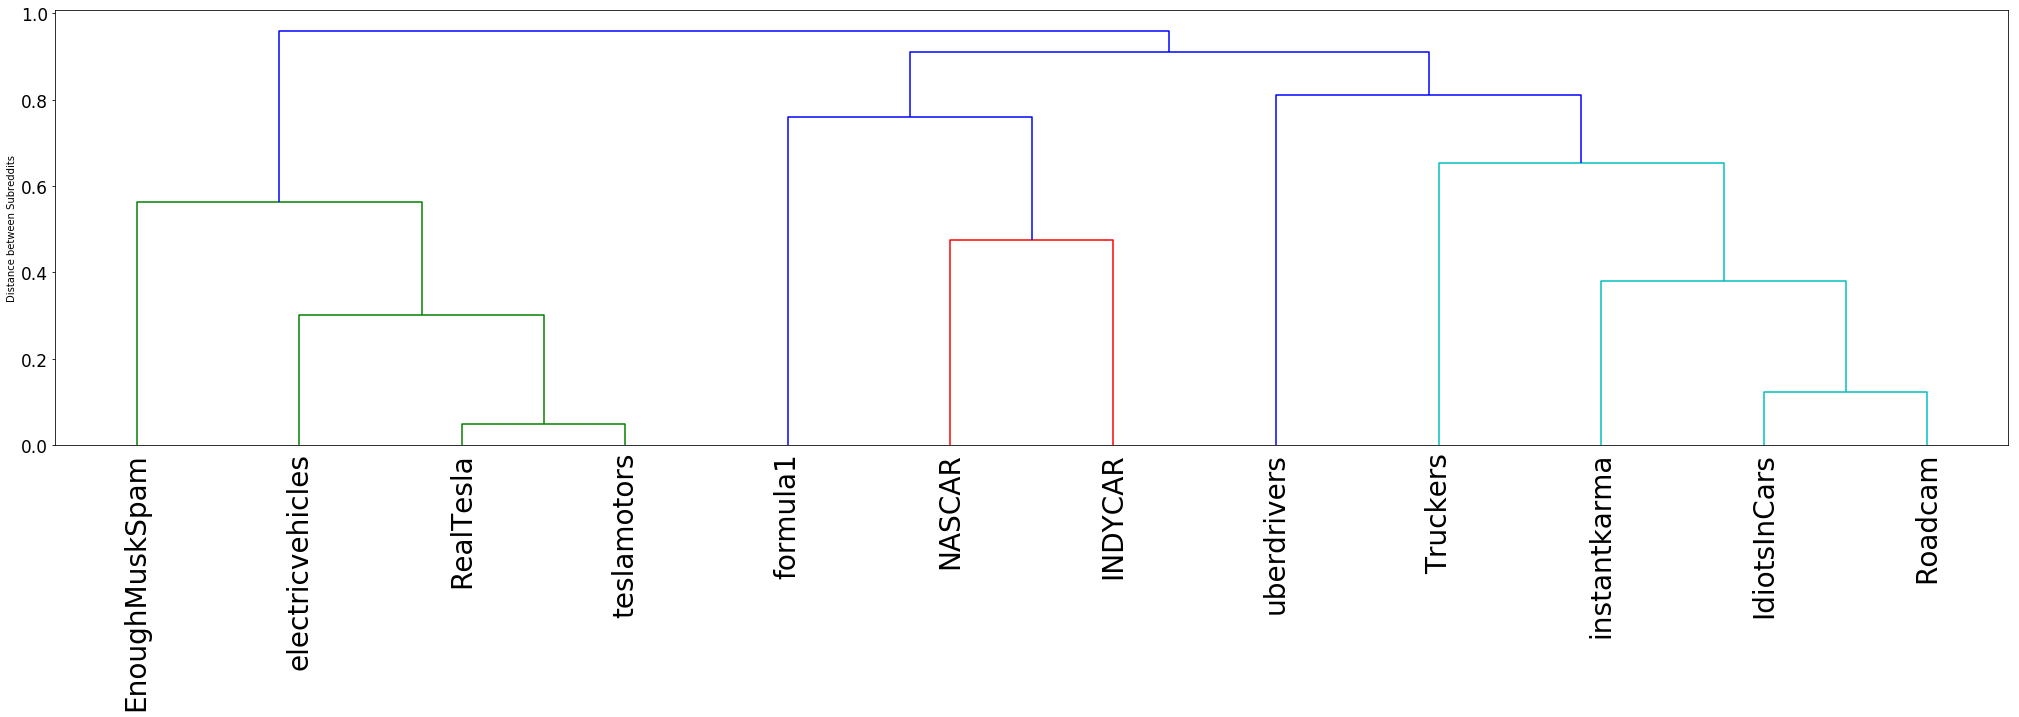


 Cluster 21 with 22 subreddits


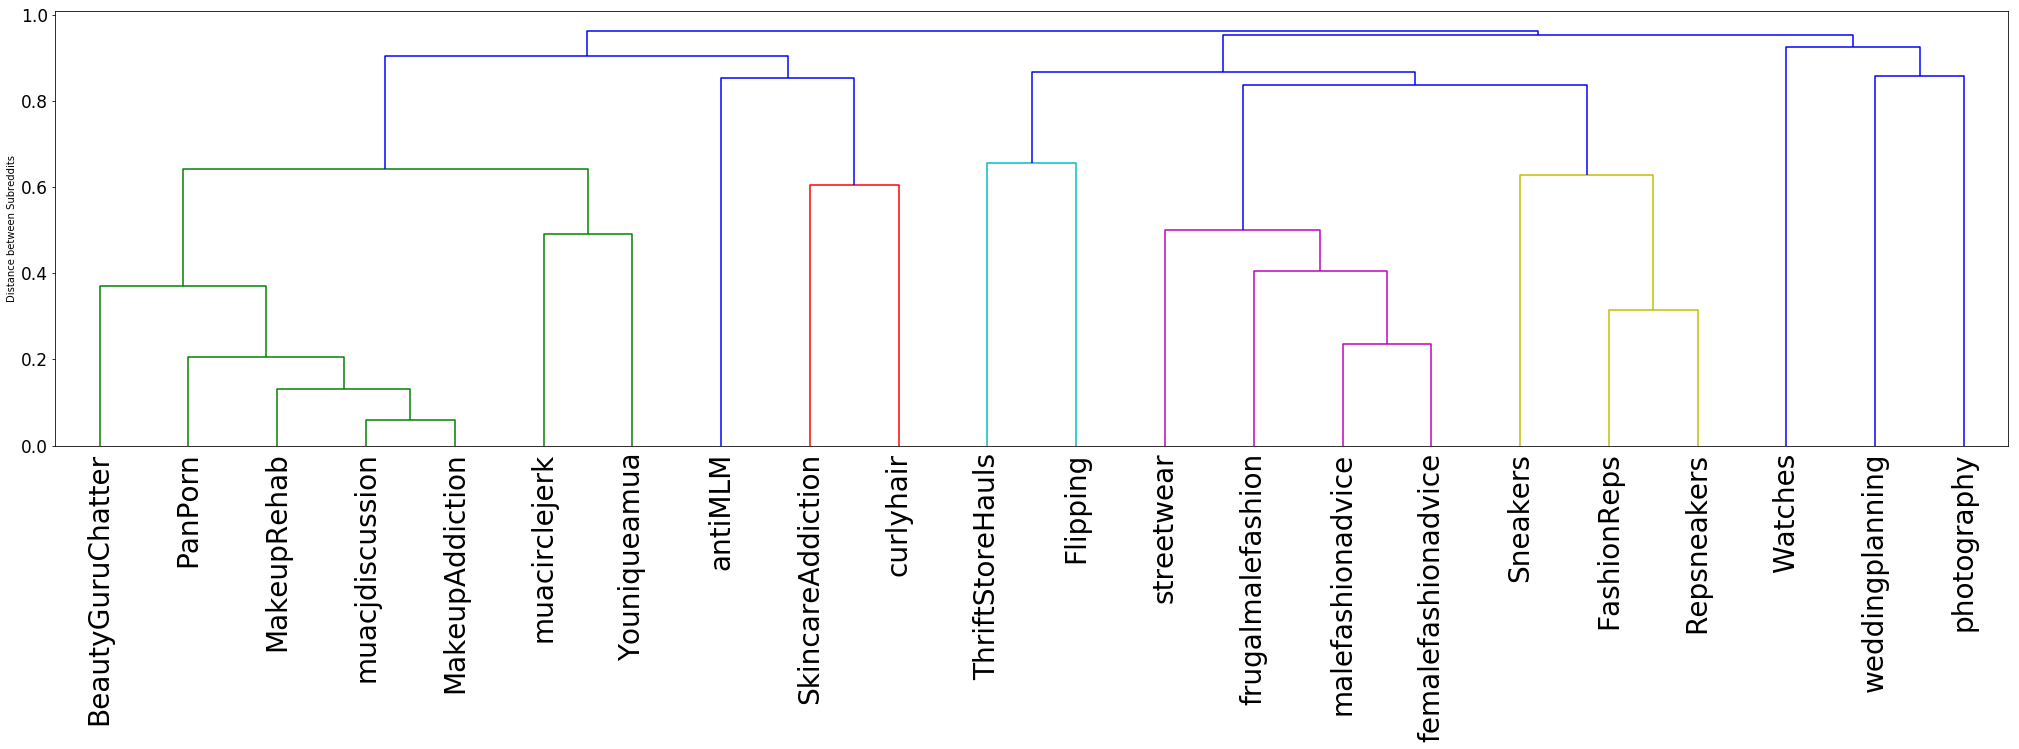


 Cluster 22 with 9 subreddits


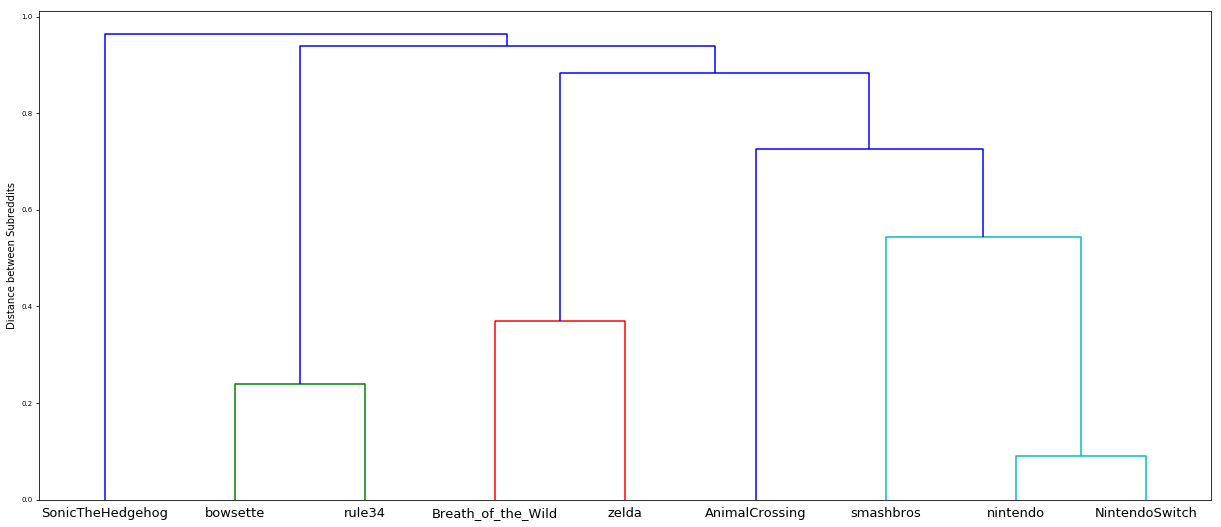


 Cluster 23 with 122 subreddits


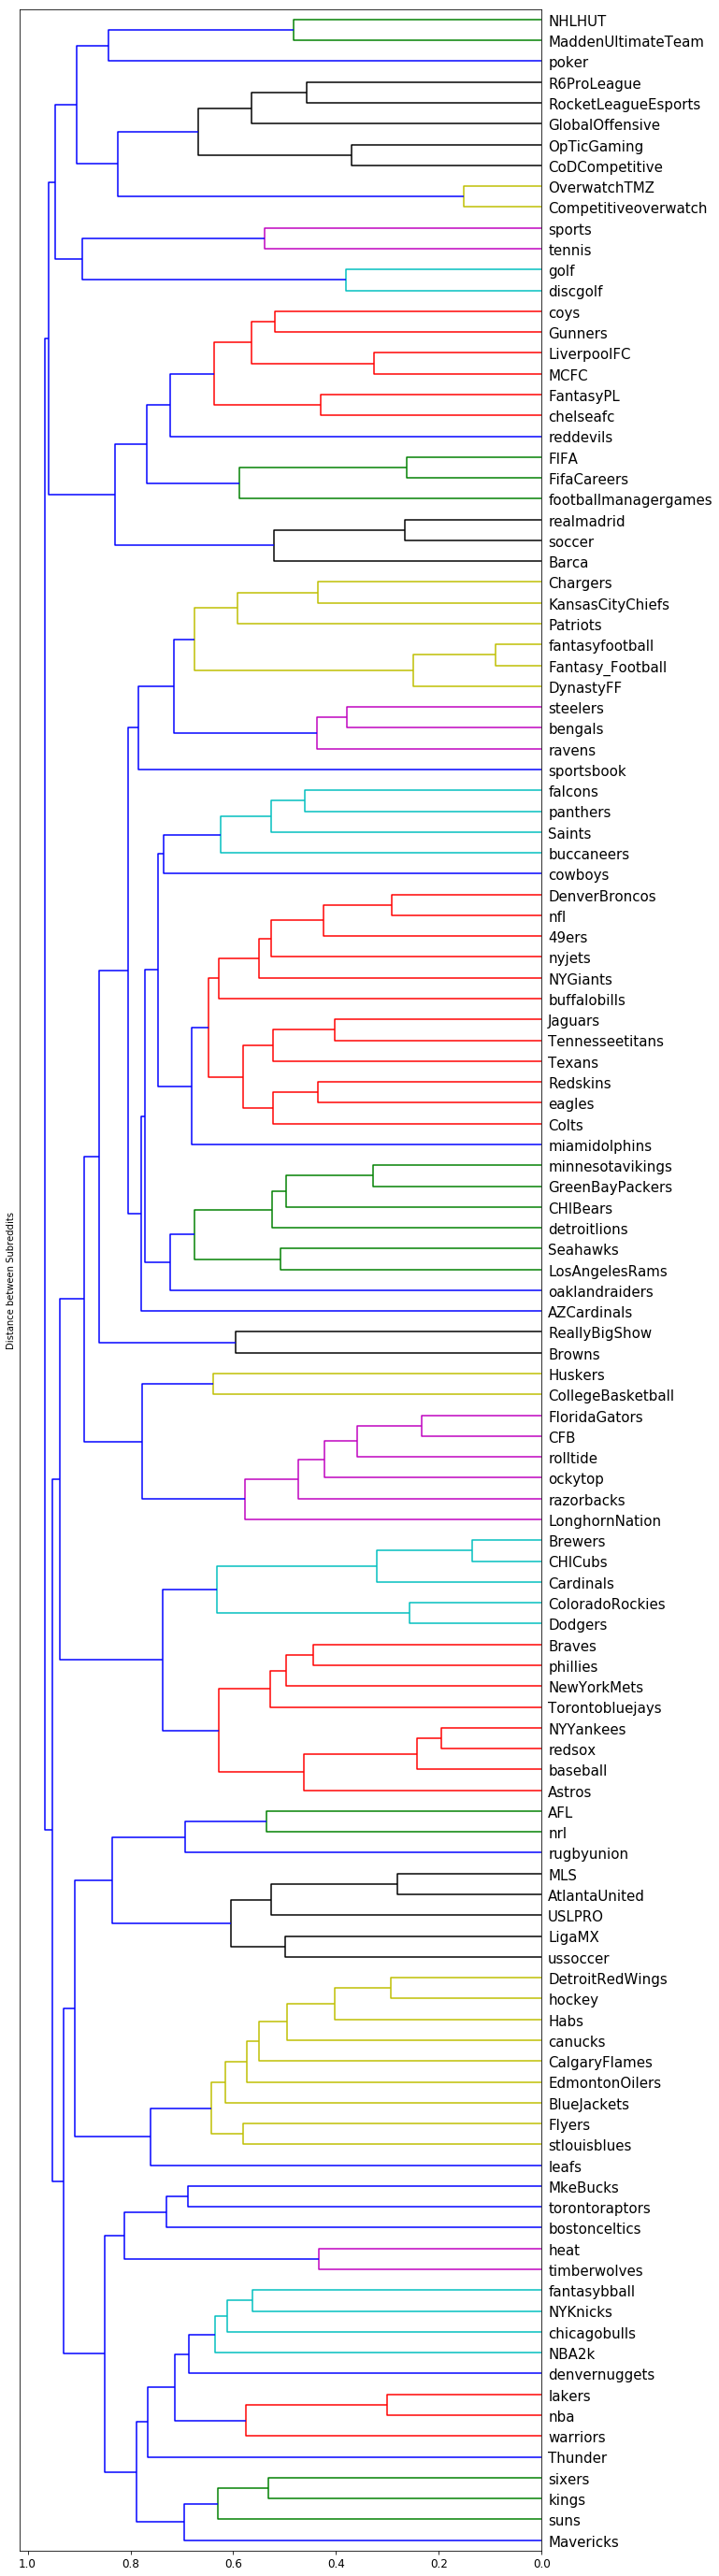


 Cluster 24 with 44 subreddits


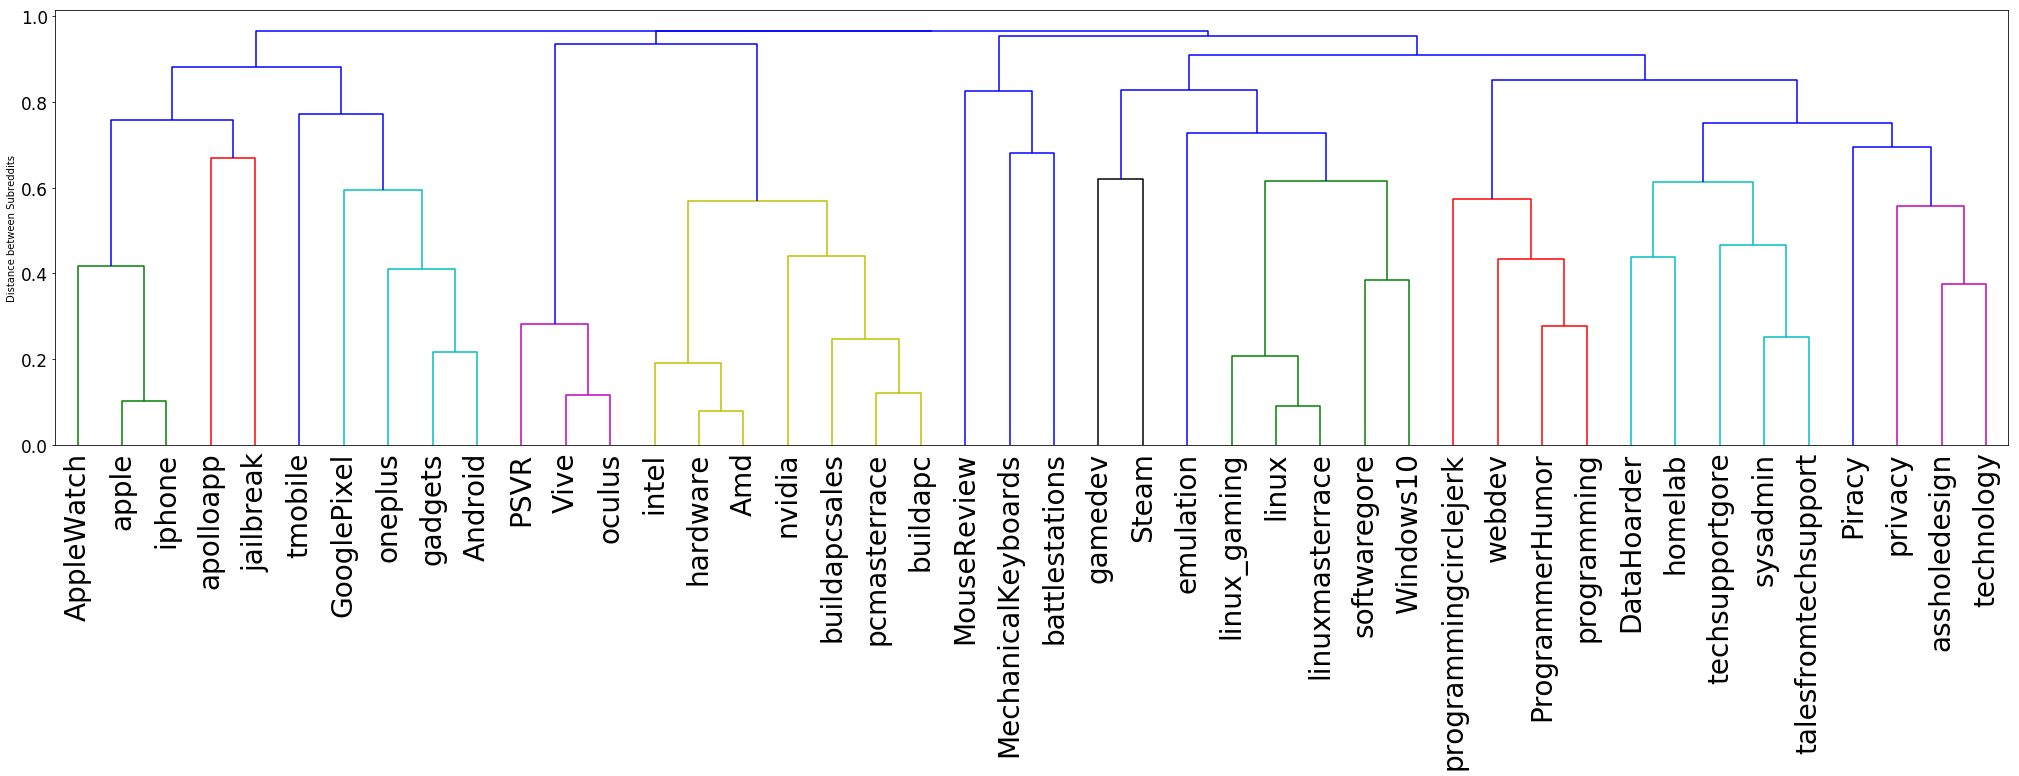


 Cluster 25 with 163 subreddits


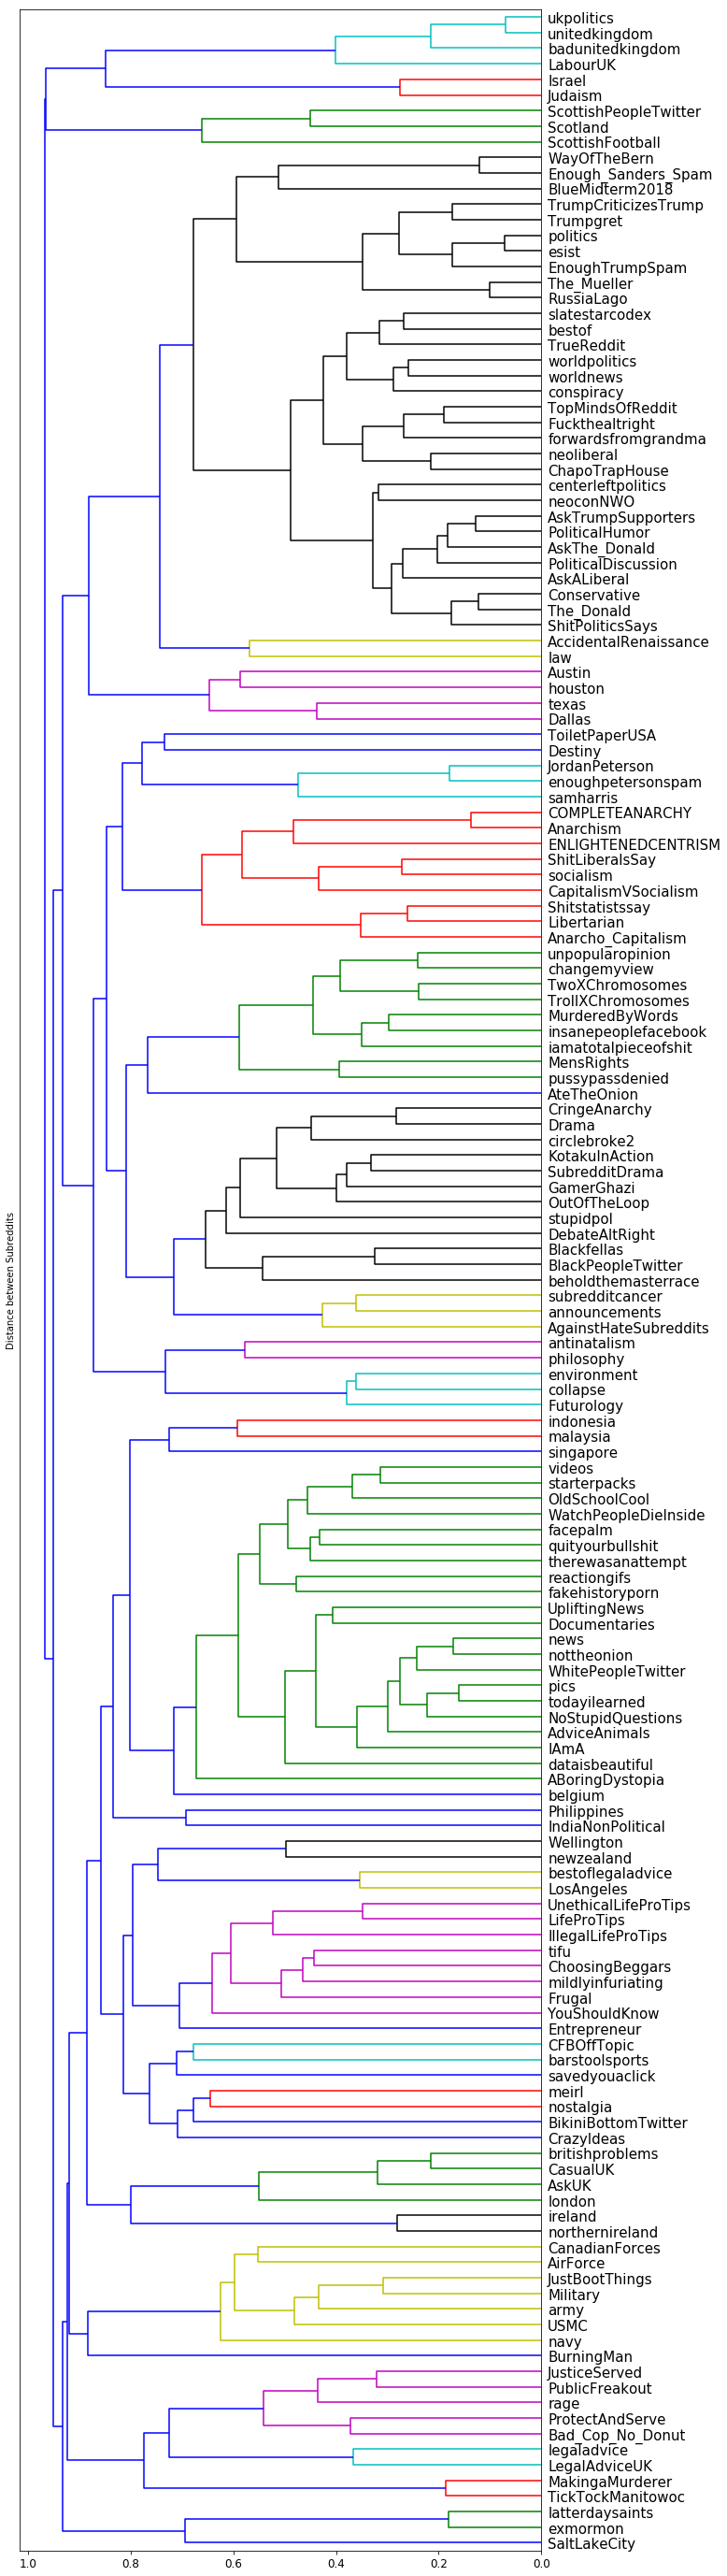


 Cluster 26 with 39 subreddits


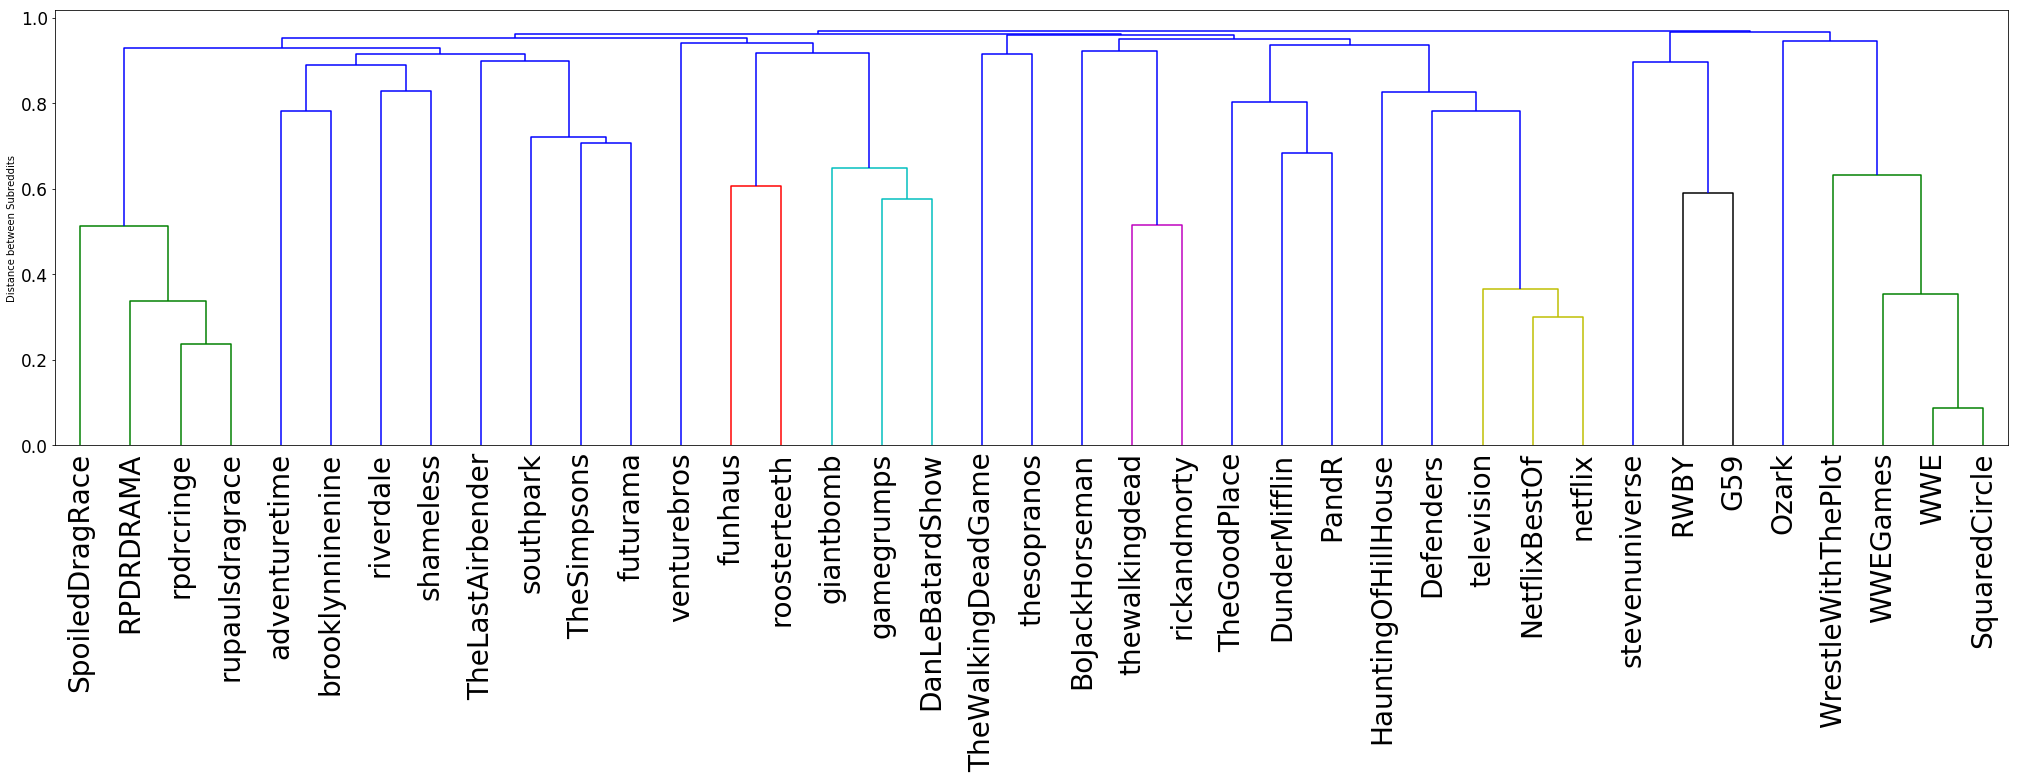


 Cluster 27 with 60 subreddits


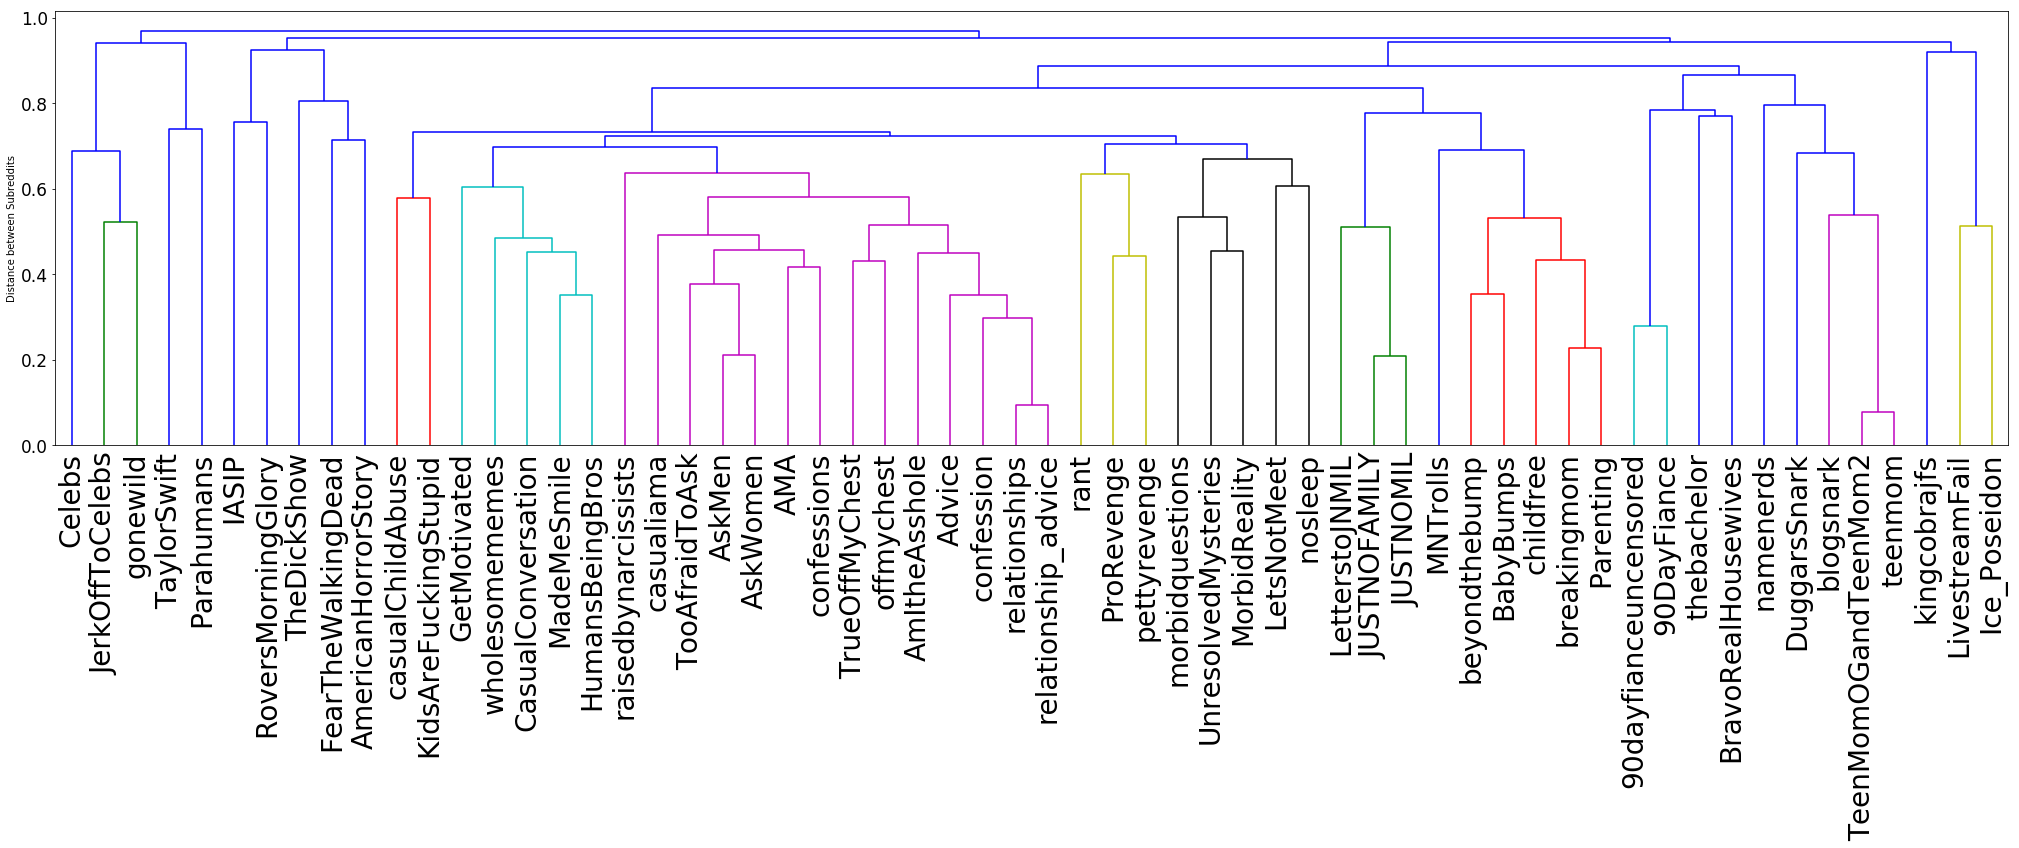


 Cluster 28 with 9 subreddits


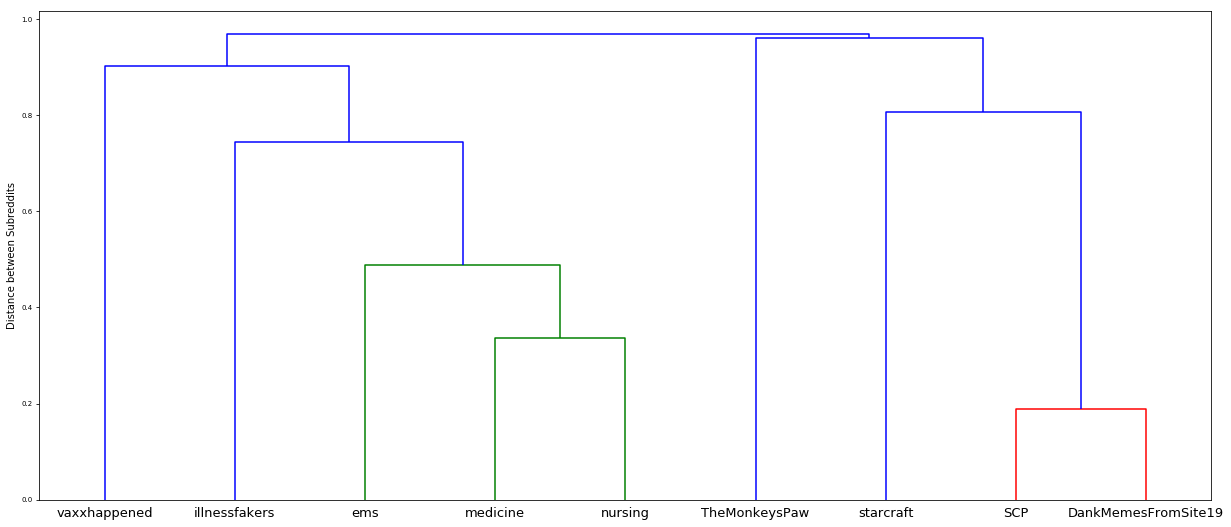


 Cluster 29 with 49 subreddits


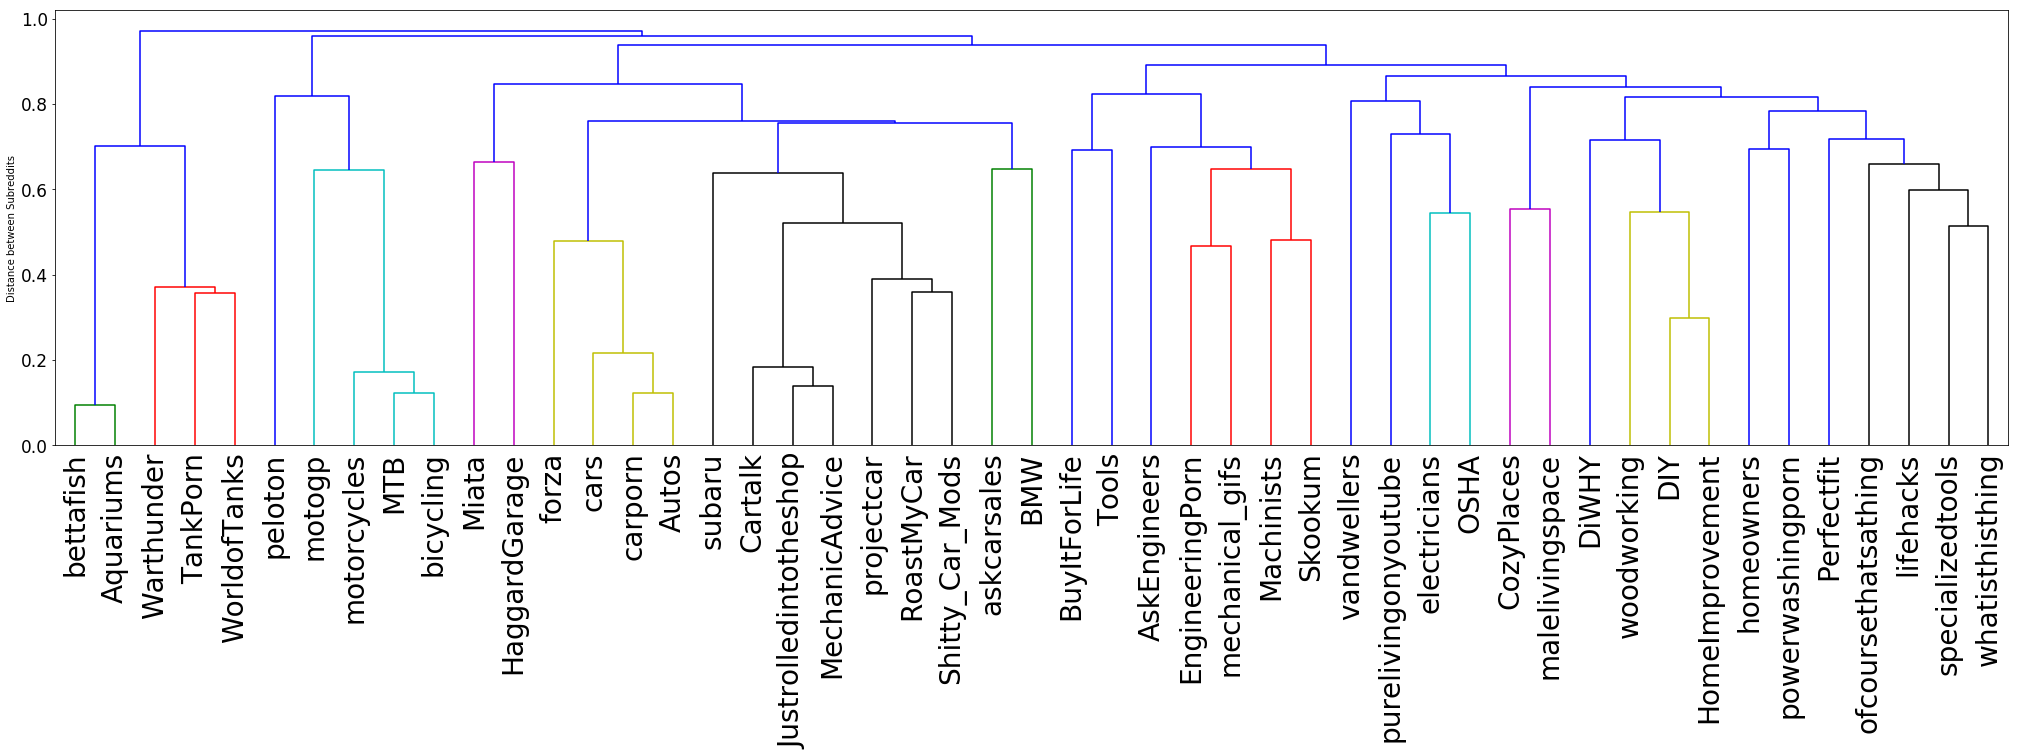


 Cluster 30 with 8 subreddits


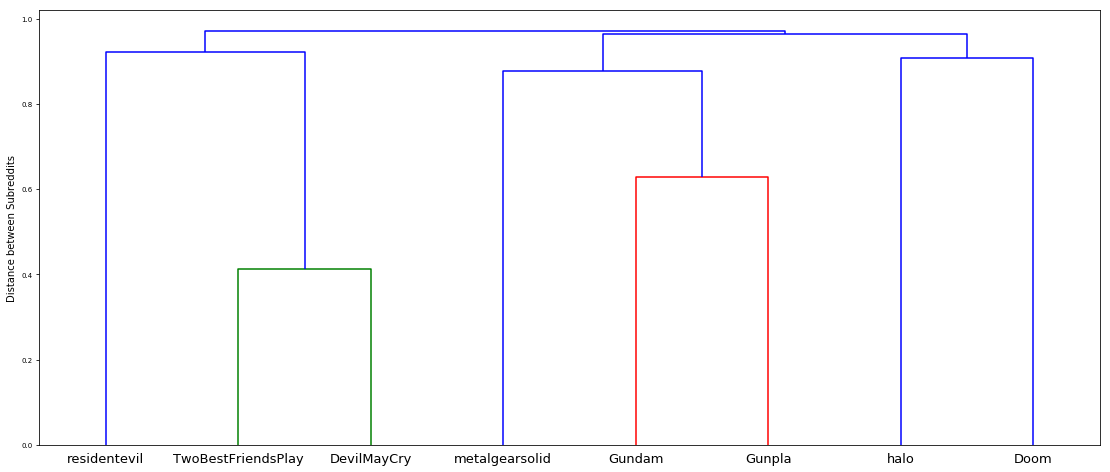


 Cluster 31 with 17 subreddits


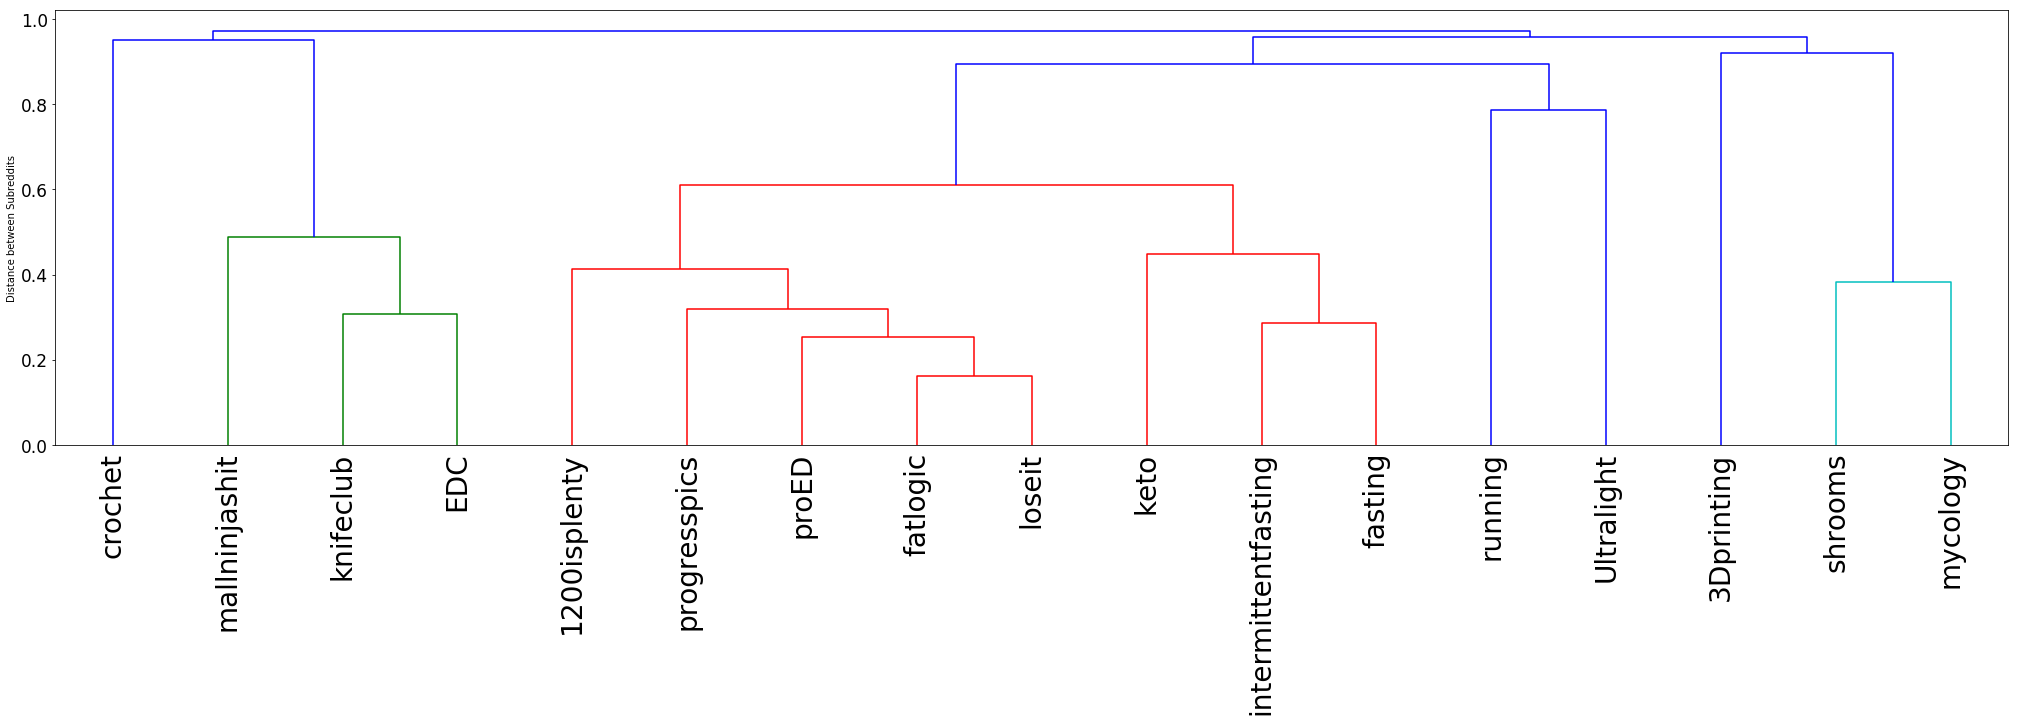


 Cluster 32 with 153 subreddits


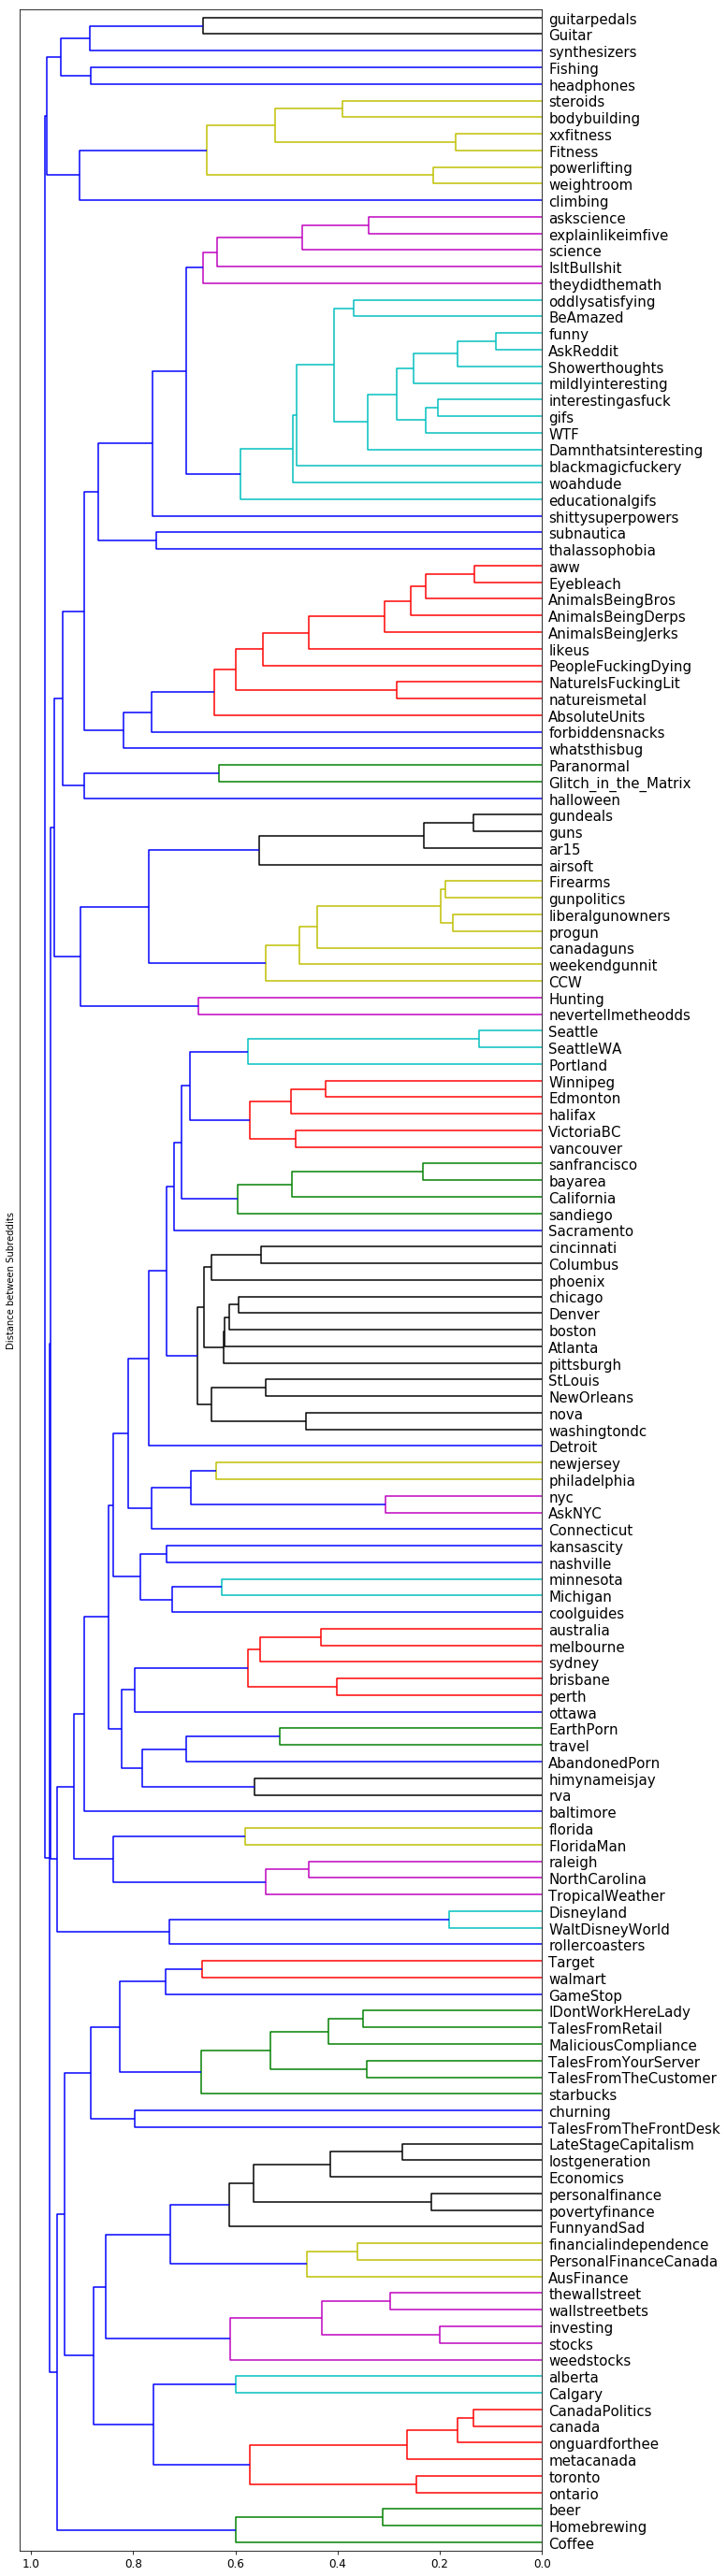


 Cluster 33 with 51 subreddits


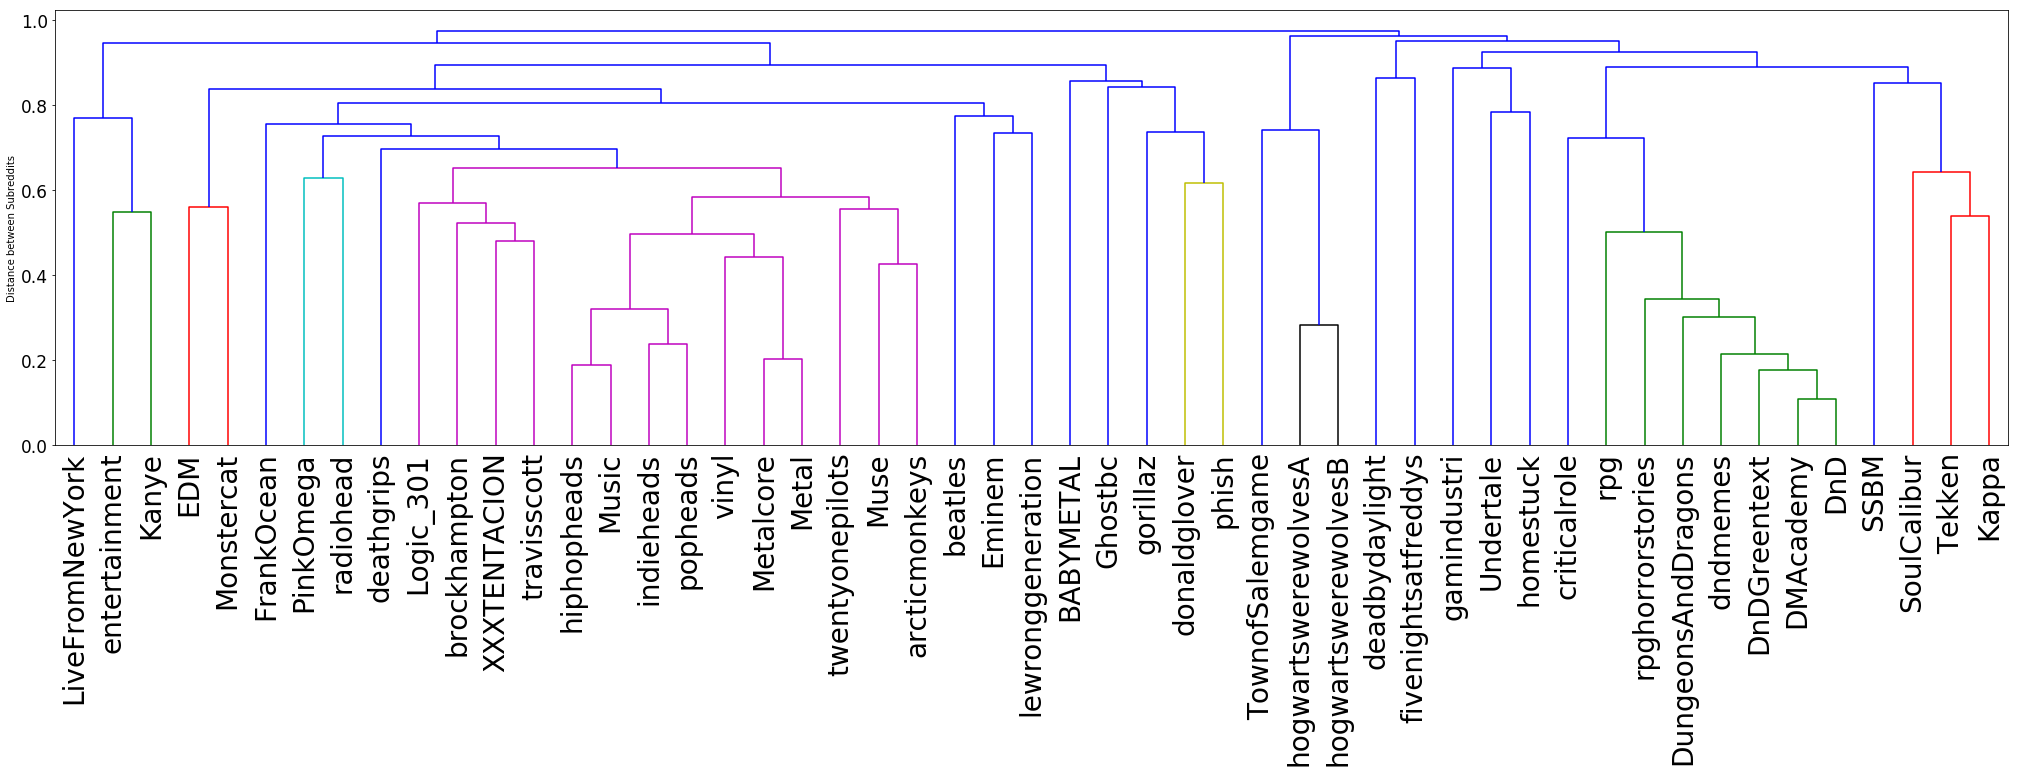


 Cluster 34 with 8 subreddits


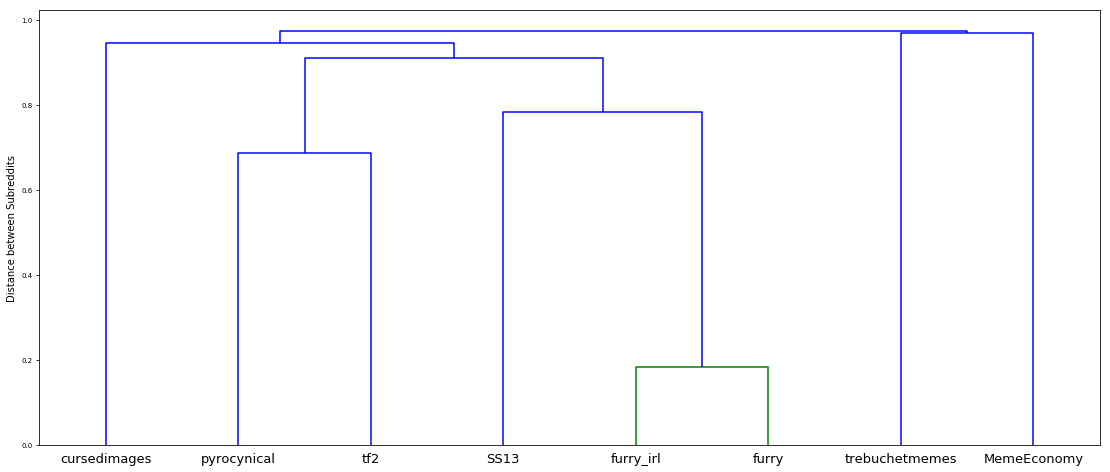


 Cluster 35 with 134 subreddits


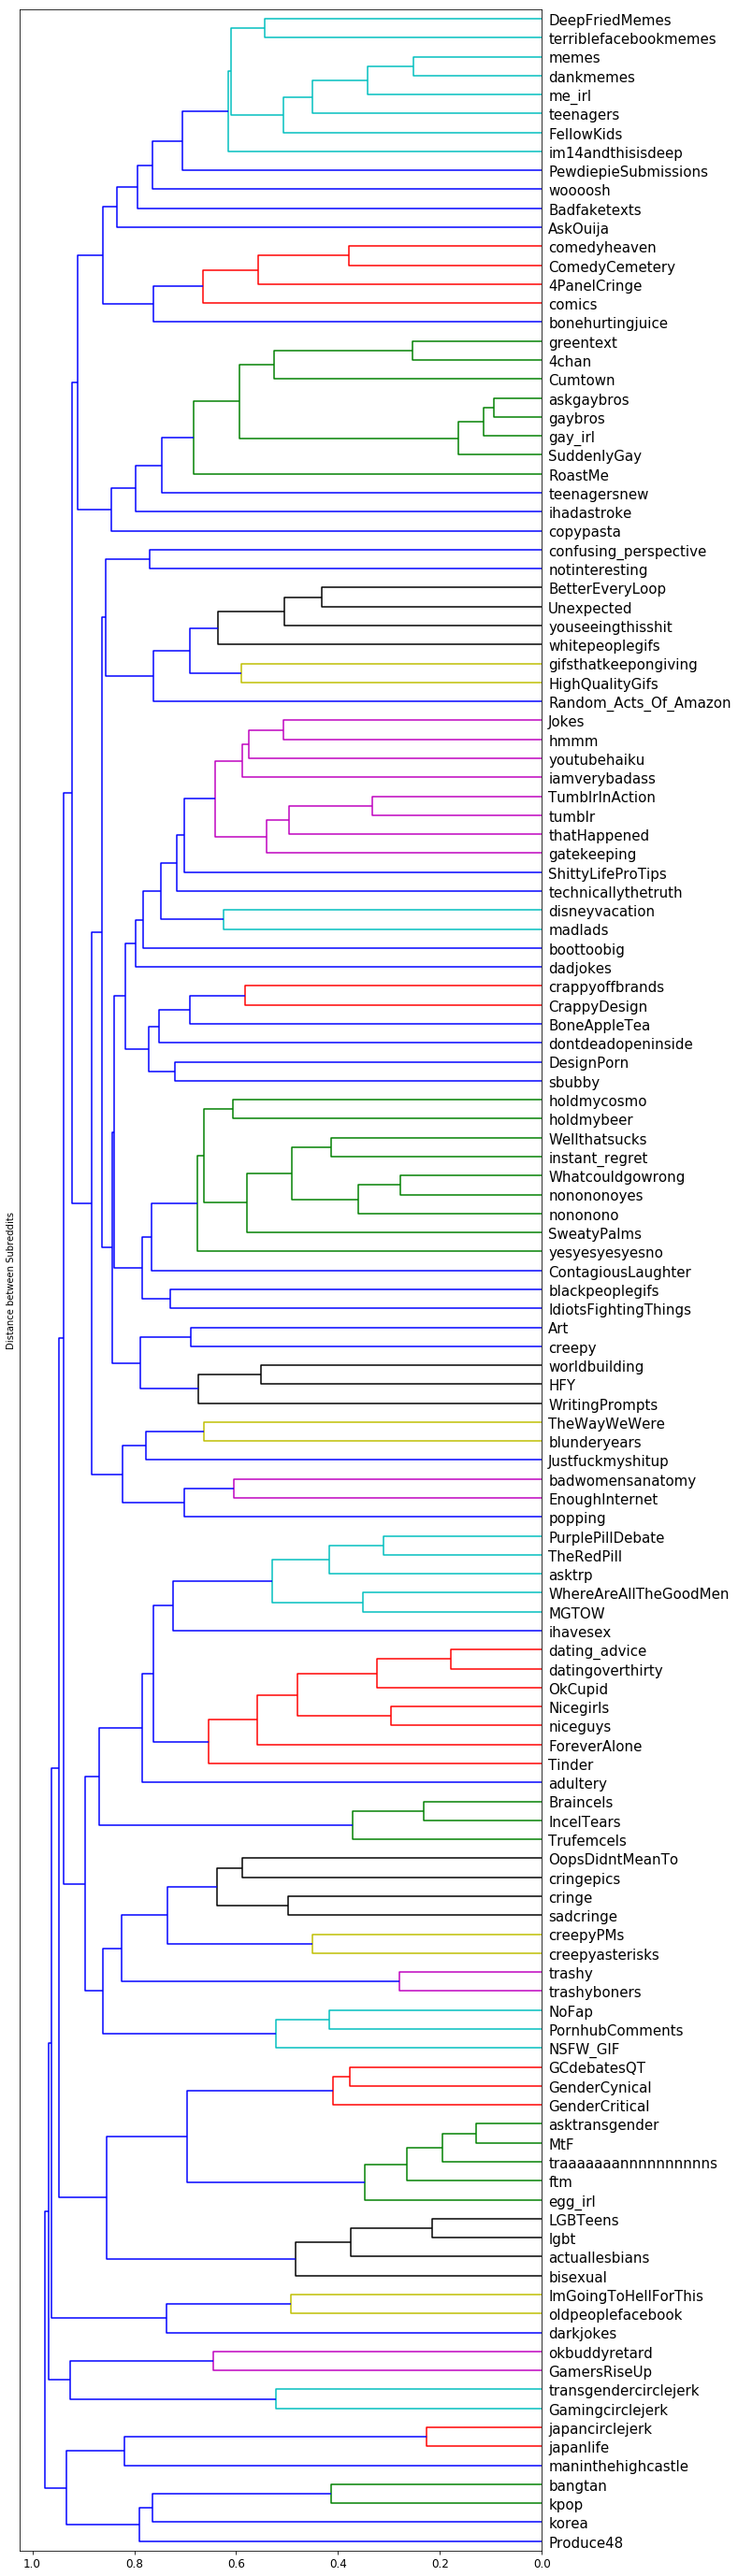


 Cluster 36 with 9 subreddits


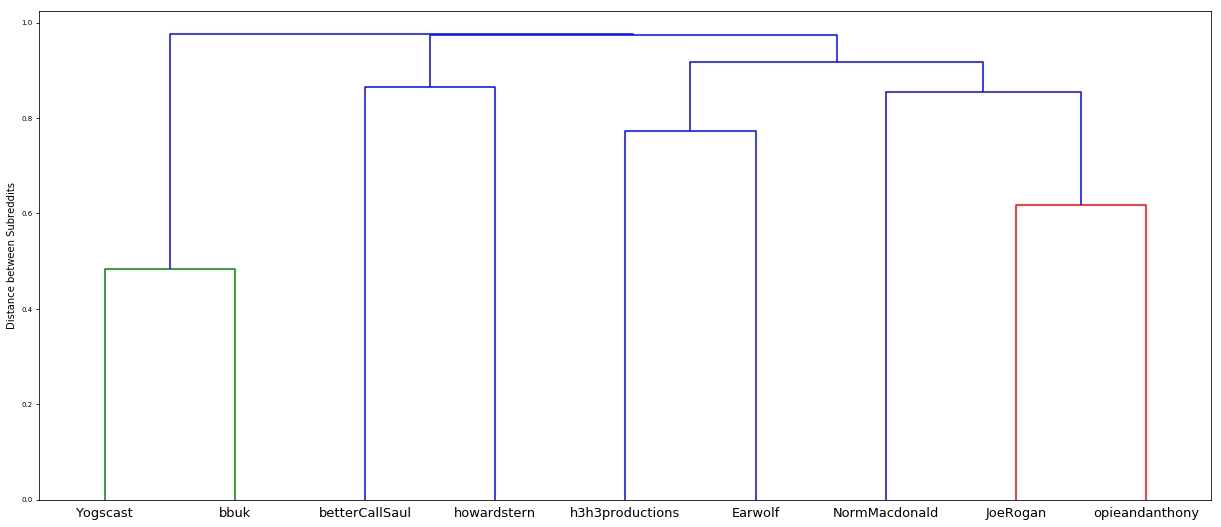


 Cluster 37 with 101 subreddits


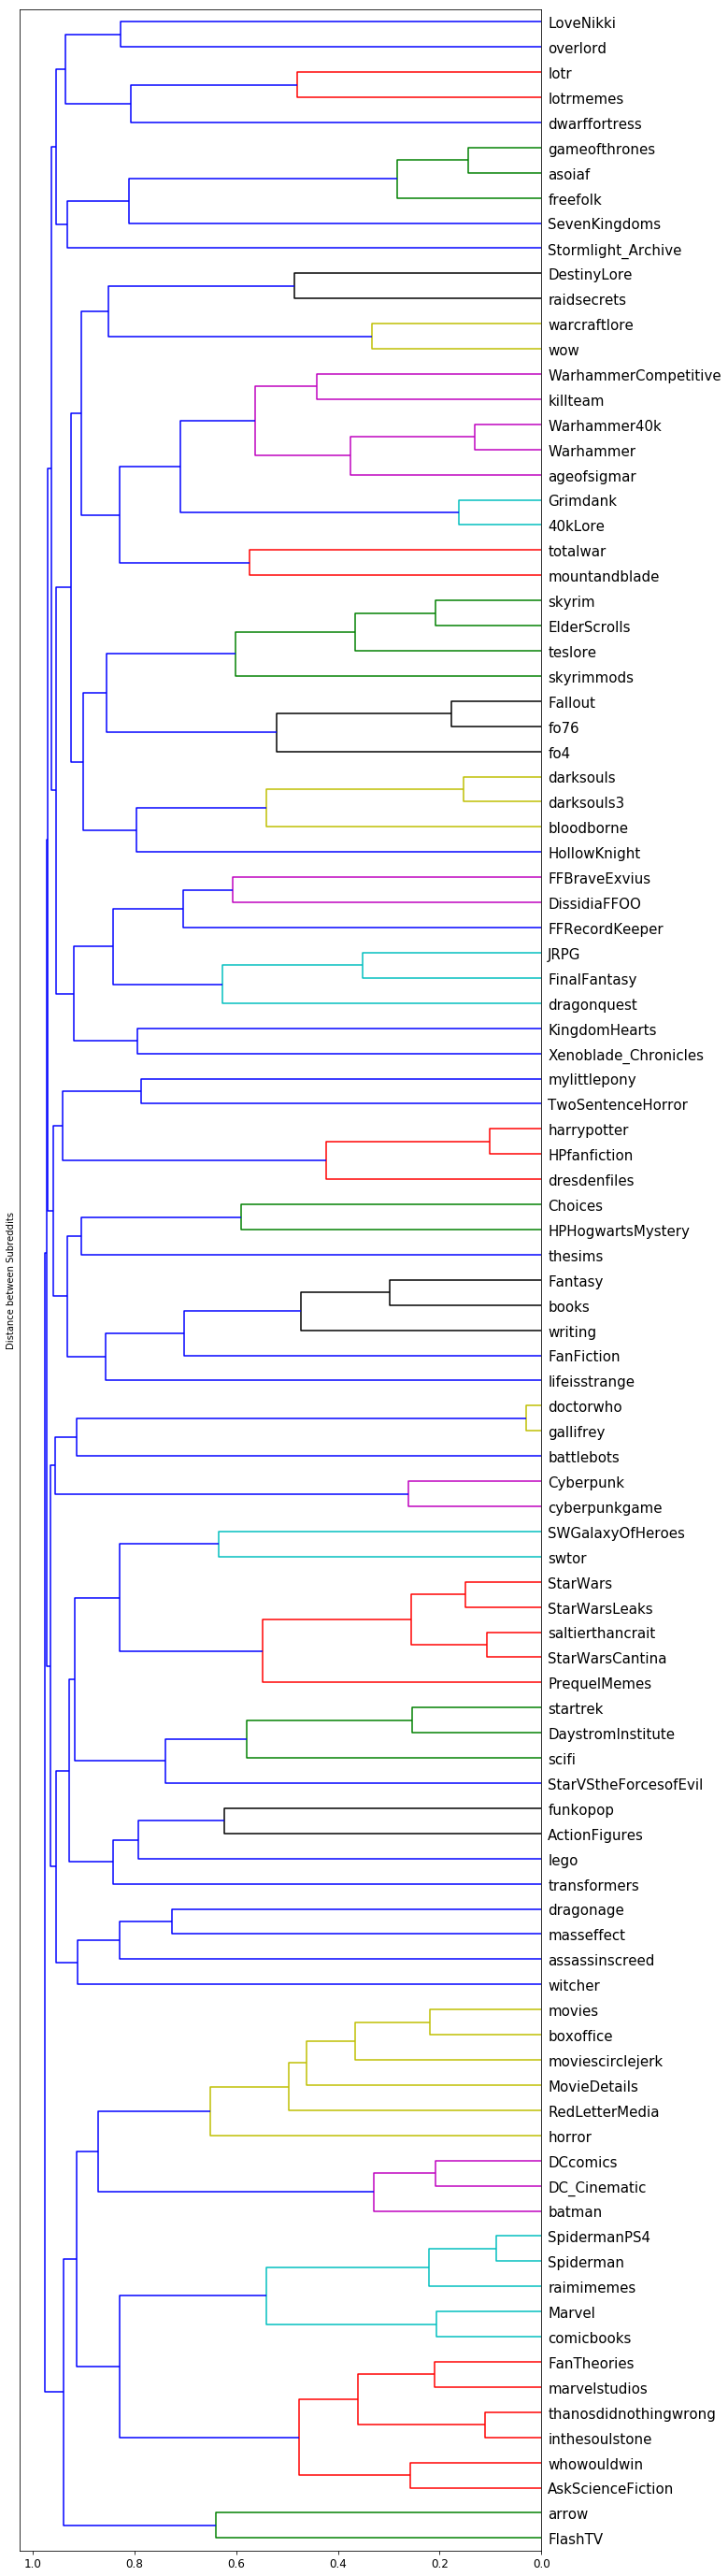


 Cluster 38 with 125 subreddits


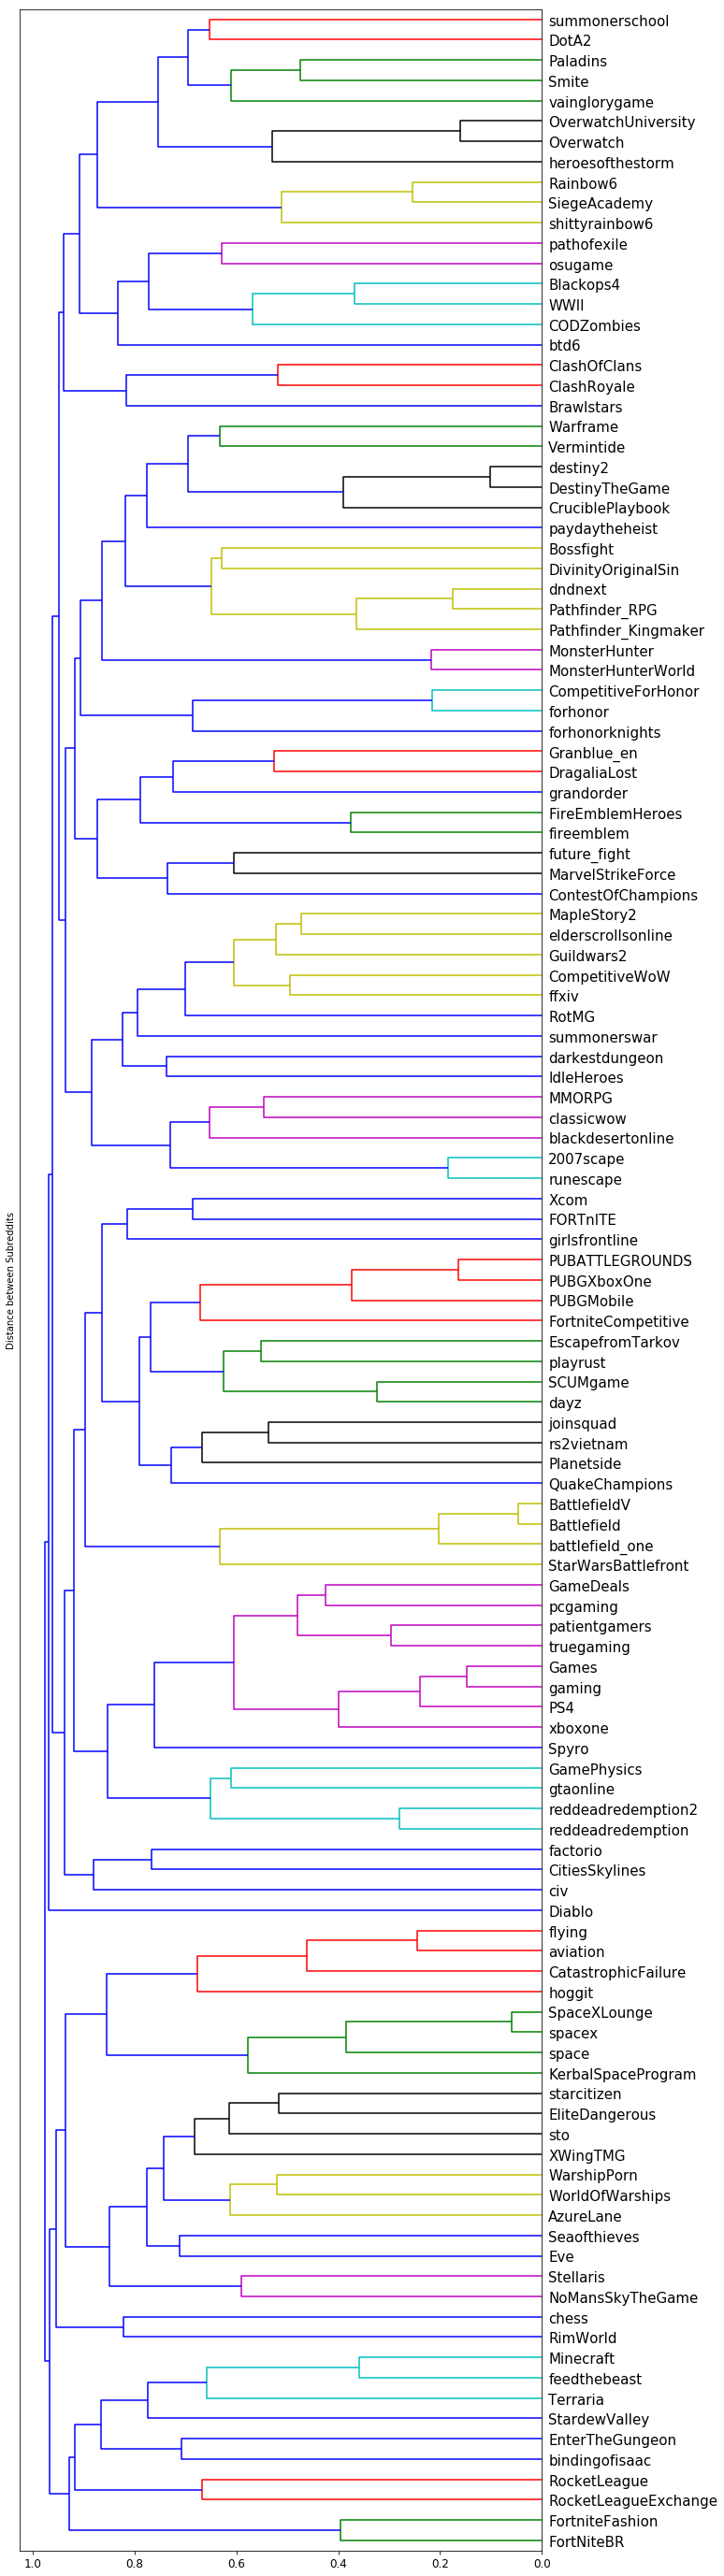


 Cluster 39 with 82 subreddits


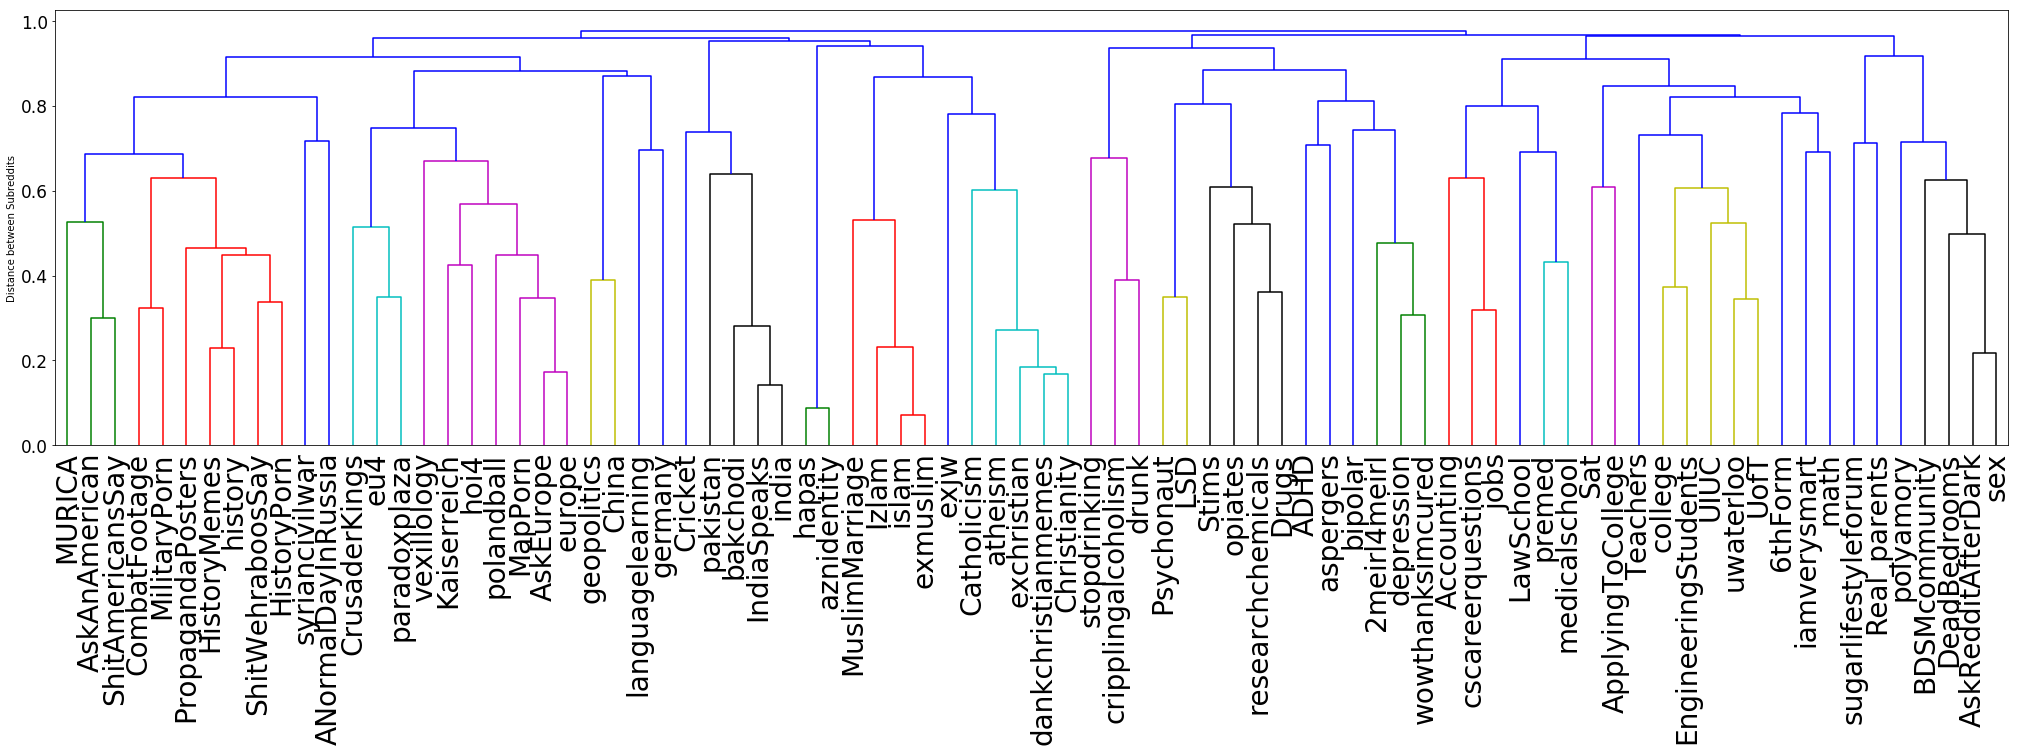


 Cluster 40 with 26 subreddits


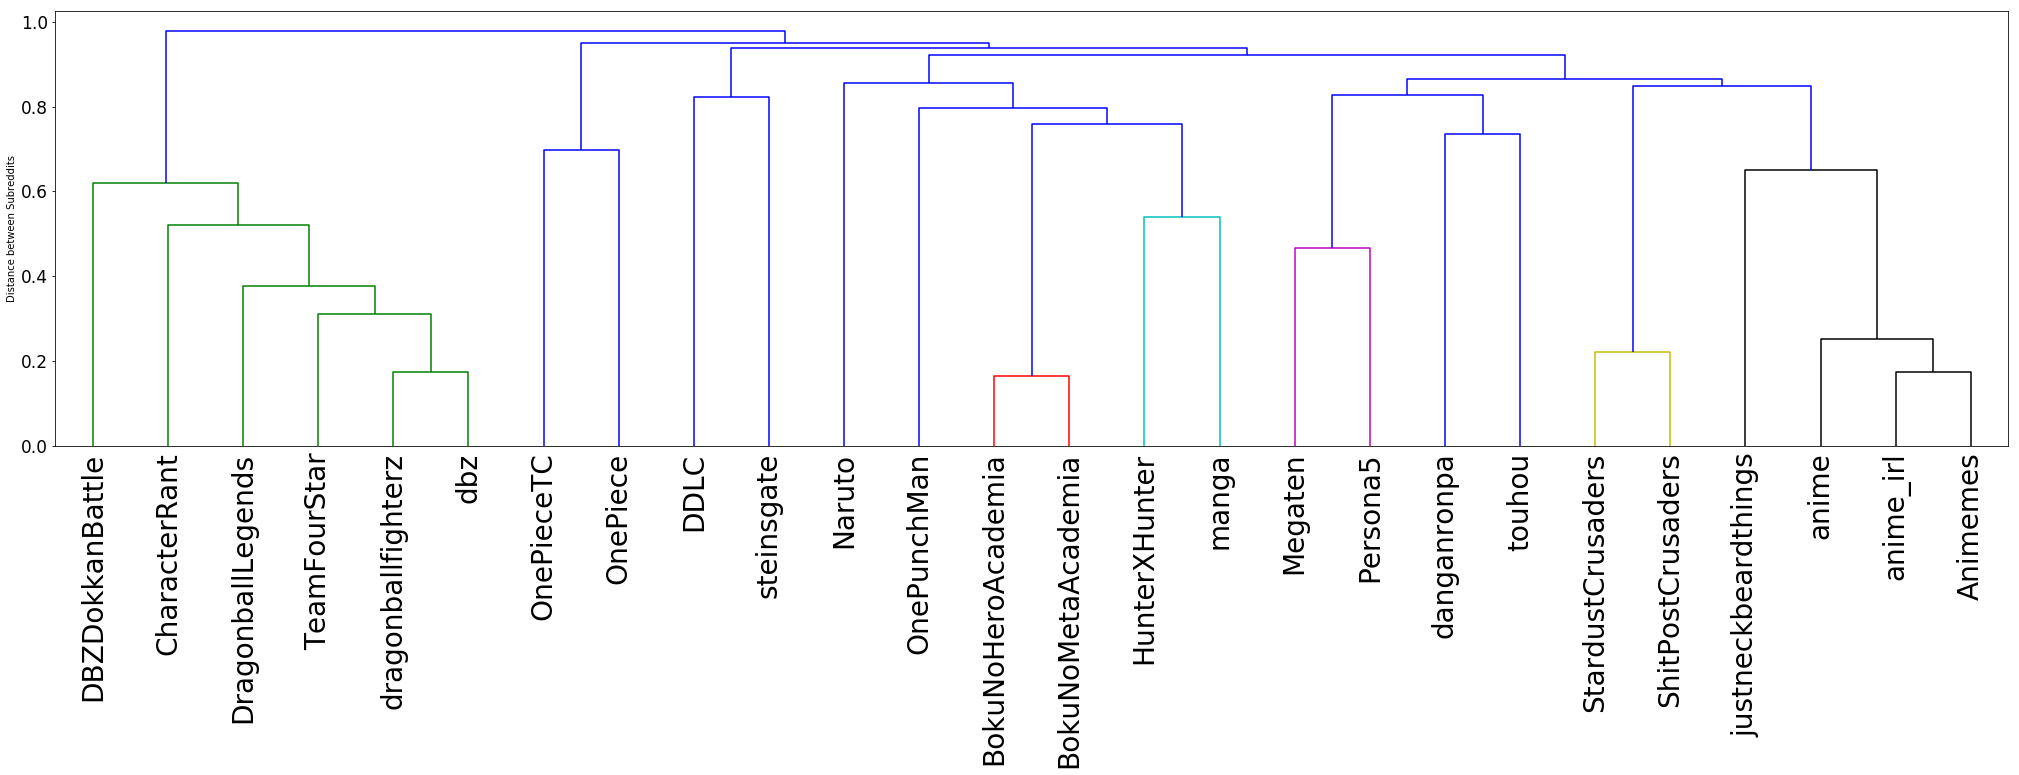

In [9]:
# prints N dendrograms (one per Cluster)

subreddit_groupsXvocwords = np.zeros([N, 15000-stop_words])

counter=1
subreddits_groups = []
for t in m:
    if t!=[]:
        print('\n Cluster '+str(counter) + ' with '+ str(len(t)) +' subreddits')
#         for s in t:
#             print(labels_dict[s], end =', ')
        if len(t) > 1 :
            matrix = np.zeros([len(t),15000-stop_words])
            matrix_labels = []
            for n, s in enumerate(t):
                matrix_labels.append(labels_dict[s])
                matrix[n,:] += subreddit_tf_idf[s,:]
            sub_z = hac.linkage(matrix, method = 'complete', metric = 'cosine')
            
#             mpl.rcParams['axes.titlesize'] = 60
            
            if len(t)<10:
                plt.figure(figsize=(2*len(t)+3, len(t)))
                hac.dendrogram(sub_z, labels = matrix_labels)
                ax = plt.gca()
                ax.tick_params(axis='x', which='major', labelsize=13)
                ax.tick_params(axis='y', which='major', labelsize=7)
#                 plt.title('Hierarchical Clustering Dendrogram of Cluster '+ str(counter), fontsize = 25)
    #             plt.xlabel('Subreddits')
                plt.ylabel('Distance between Subreddits')
            
            elif len(t)>300:
                plt.figure(figsize=(10, 150))
                hac.dendrogram(sub_z, labels = matrix_labels, orientation = 'left')
                ax = plt.gca()
                ax.tick_params(axis='x', which='major', labelsize=12)
                ax.tick_params(axis='y', which='major', labelsize=15)
#                 plt.title('Hierarchical Clustering Dendrogram of Cluster '+ str(counter), fontsize = 55)
    #             plt.xlabel('Subreddits')
                plt.ylabel('Distance between Subreddits')
            
            elif len(t)>100:
                plt.figure(figsize=(10, 50))
                hac.dendrogram(sub_z, labels = matrix_labels, orientation = 'left')
                ax = plt.gca()
                ax.tick_params(axis='x', which='major', labelsize=12)
                ax.tick_params(axis='y', which='major', labelsize=15)
#                 plt.title('Hierarchical Clustering Dendrogram of Cluster '+ str(counter), fontsize = 25)
    #             plt.xlabel('Subreddits')
                plt.ylabel('Distance between Subreddits')
        
            
                
            else:
                plt.figure(figsize=(35, 8))
#                 if len(t)>=10 and len(t)<30:   
#                     hac.dendrogram(sub_z, labels = matrix_labels, leaf_rotation=45.)
#                 else:
                hac.dendrogram(sub_z, labels = matrix_labels, leaf_rotation=90.)
                ax = plt.gca()
                ax.tick_params(axis='x', which='major', labelsize=28)
                ax.tick_params(axis='y', which='major', labelsize=17)
#                 plt.title('Hierarchical Clustering Dendrogram of Cluster '+ str(counter), fontsize = 25)
#                 plt.xlabel('Subreddits')
                plt.ylabel('Distance between Subreddits')

            plt.show()
                
            subreddits_groups.append('Cluster '+str(counter))
        else:
            subreddits_groups.append(t)
            
        counter+=1               

In [10]:
subreddit_groupsXvocwords = np.zeros([N, 15000-stop_words])

counter=0
subreddits_groups = []
for t in m:
    if t!=[]:
        for s in t:
            subreddit_groupsXvocwords[counter,:] += count_matrix_small[s,:]
        counter+=1

In [12]:
hac_tfidf = tfidf(subreddit_groupsXvocwords)
normalized_hac = np.zeros([N, 15000 - stop_words])

for i in range(15000 - stop_words):
    normalized_hac[:,i] += hac_tfidf[:,i]/sum(hac_tfidf[:,i])
    
# for i in range(15000 - stop_words):
#     print(max(normalized_hac[:,i]))

In [13]:
HAC_matrix= np.zeros([15003,40])

with open('vocab.bpe.from','r') as f:
    keys = f.read().splitlines()
    for i, key in enumerate(keys):
        if key in voc_dict_inv_clean.keys():
            HAC_matrix[i,:] += normalized_hac[:,voc_dict_inv_clean[key]]

In [14]:
with open('HAC_vectors.pickle', 'wb') as h:
    pickle.dump(HAC_matrix, h)